# AutoMLPipe-BC Jupyter Notebook

This notebook runs all aspects of the autoMLPipe-BC. Pipeline run parameters are set throughout the notebook at the start of each section. Manditory run parameters that must set for the pipeline to run properly are identified below.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Jupyter Notebook Hack: This code ensures that the results of multiple commands within a given cell are all displayed, rather than just the last. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Phase 1: Exploratory Analysis

### Phase 1: Import Python Packages

In [2]:
import sys
import os
import glob
import time
import csv
import pandas as pd
import numpy as np
import random
import ExploratoryAnalysisMain
import ExploratoryAnalysisJob

### Phase 1: Set Run Parameters

#### Manditory Parameters to Update

In [3]:
test_run = True #Leave true to run the local test dataset, make False to specify a different data folder path below

#Target dataset folder path(must include one or more .txt or .csv datasets)
data_path = "C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData" 

#Output foder path: where to save pipeline outputs
output_path = 'C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing'

#Unique experiment name - folder created for this analysis within output folder path
experiment_name = 'hcc_test'

# Data Labels
class_label = 'Class' #i.e. class outcome column label
instance_label = 'InstanceID' #If data includes instance labels, given respective column name here, otherwise put 'None'

#Manually specify features to leave out of analysis, or which to treat as categorical (without using built in variable type detector)
ignore_features = [] #list of column names to exclude from the analysis (only insert column names if needed, otherwise leave empty)
categorical_feature_headers = [] # empty list for 'auto-detect' otherwise list feature names to be treated as categorical. Only impacts algorithms that can take variable type into account.

#### Optional Parameters to Update

In [4]:
cv_partitions = 3
partition_method = 'S' # S or R or M for stratified, random, or matched, respectively
match_label = 'None' # only applies when M selected for partition-method; indicates column label with matched instance ids' 

categorical_cutoff = 10 # number of unique values after which a variable is considered to be quantitative vs categorical
sig_cutoff = 0.05 #significance cutoff used throughout pipeline
export_exploratory_analysis = 'True' # run and export basic exploratory analysis files, i.e. unique value counts, missingness counts, class balance barplot
export_feature_correlations = 'True' # run and export feature correlation analysis (yields correlation heatmap)
export_univariate_plots = 'True' # export univariate analysis plots (note: univariate analysis still output by default)
topFeatures = 20 #Number of top features to report in notebook for univariate analysis
random_state = 42 # sets a specific random seed for reproducible results

#### Set and Report Data Folder Path as Specified

In [5]:
if test_run:
    wd_path = os.getcwd() #Working directory path automatically detected
    wd_path = wd_path.replace('\\','/')
    data_path = wd_path+'/TestData'
print("Data Folder Path: "+data_path)
jupyterRun = 'True' #Leave True

Data Folder Path: C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData


### Phase 1: Conduct Exploratory Analysis

In [6]:
ExploratoryAnalysisMain.makeDirTree(data_path,output_path,experiment_name,jupyterRun)

---------------------------------------------------------------------------------
C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData/hcc-data_example.csv
Data Counts: ----------------
Instance Count = 165
Feature Count = 49
    Categorical  = 28
    Quantitative = 21
Class Counts: ----------------
0    102
1     63
Name: Class, dtype: int64


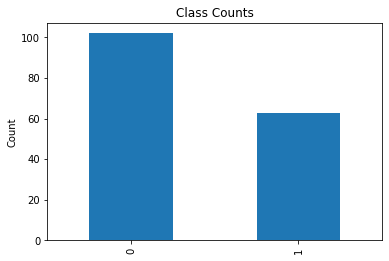

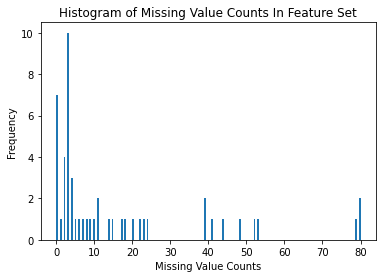

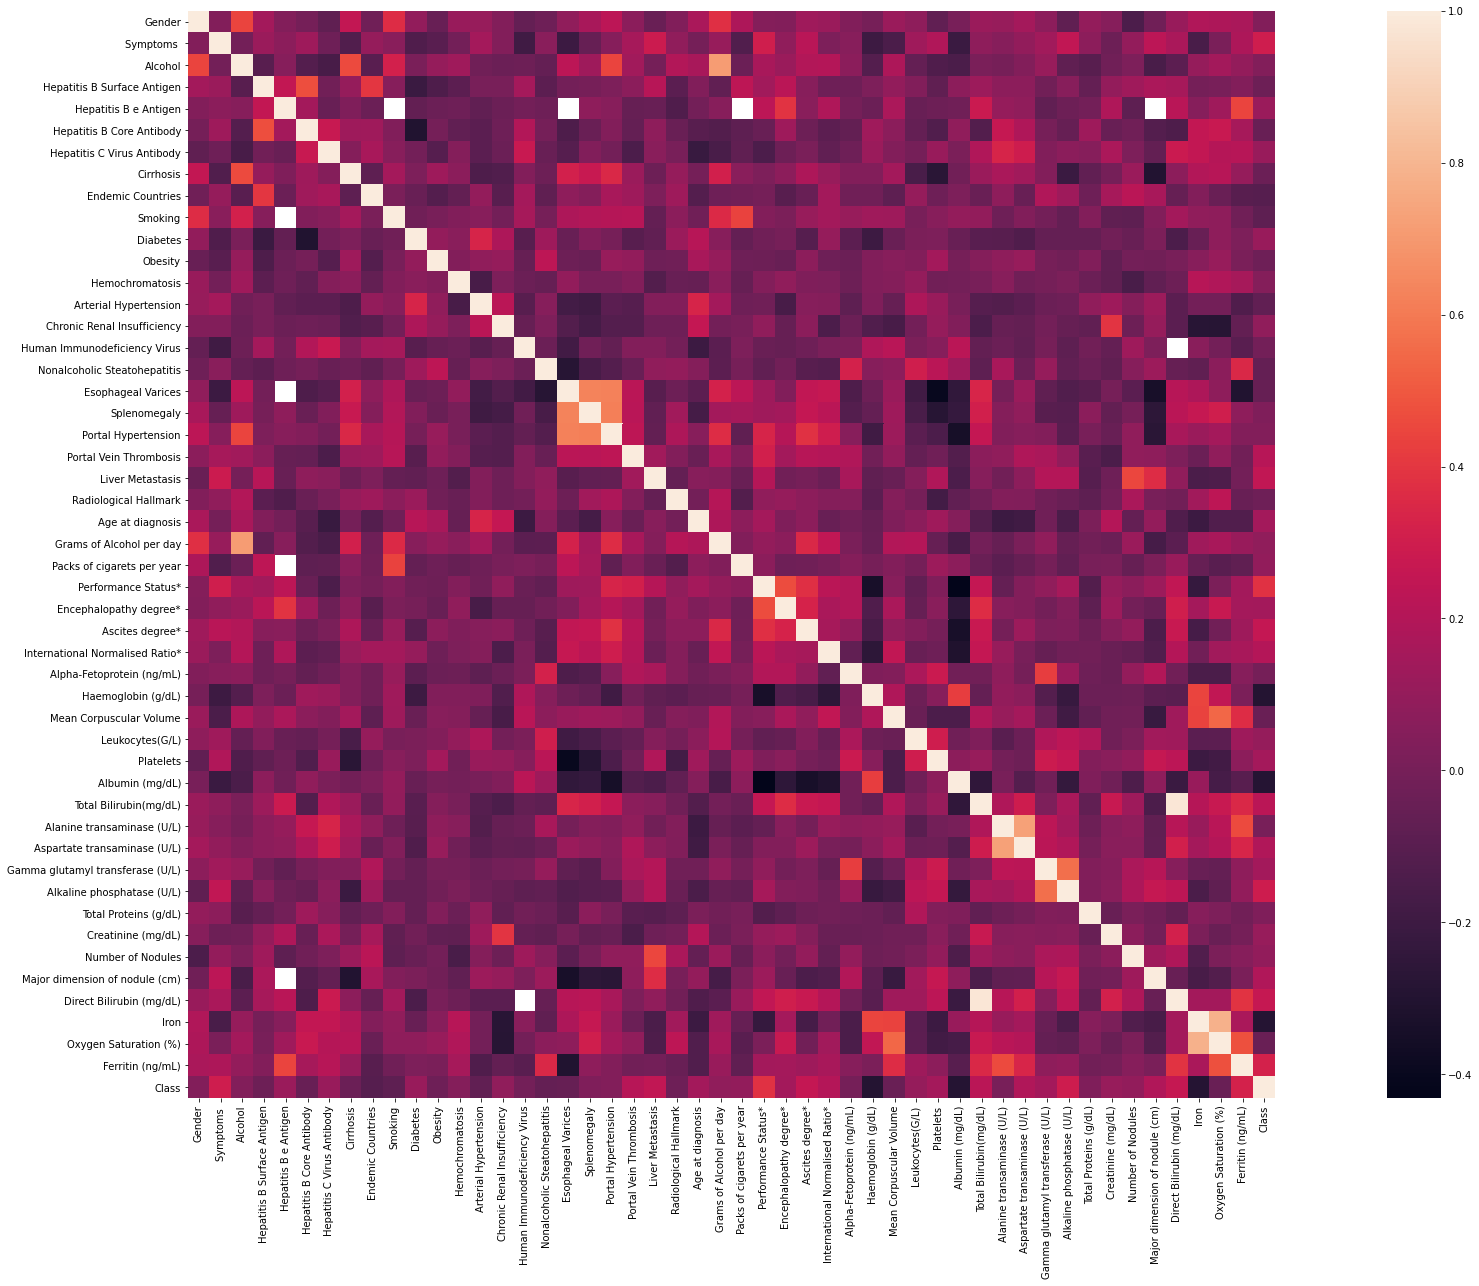

Plotting top significant 20 features.
###################################################
Significant Univariate Associations:
Alkaline phosphatase (U/L): (p-val = 3.5403912777218106e-06)
Iron: (p-val = 3.5423866432400713e-06)
Alpha-Fetoprotein (ng/mL): (p-val = 1.0082106490397668e-05)
Haemoglobin (g/dL): (p-val = 1.3037749087103508e-05)
Performance Status*: (p-val = 3.2548676278782114e-05)
Oxygen Saturation (%): (p-val = 3.998706534072513e-05)
Albumin (mg/dL): (p-val = 5.159435074542993e-05)
Symptoms : (p-val = 0.0006092985105592953)
Aspartate transaminase (U/L): (p-val = 0.002884797765802902)
Liver Metastasis: (p-val = 0.002993588224869906)
Ascites degree*: (p-val = 0.0038134308539161175)
Ferritin (ng/mL): (p-val = 0.004446494113520735)
Portal Vein Thrombosis: (p-val = 0.01174304115542567)
Major dimension of nodule (cm): (p-val = 0.01569067499758109)
Age at diagnosis: (p-val = 0.01784161875604351)
Gamma glutamyl transferase (U/L): (p-val = 0.02438867167652392)
Total Proteins (g/dL): 

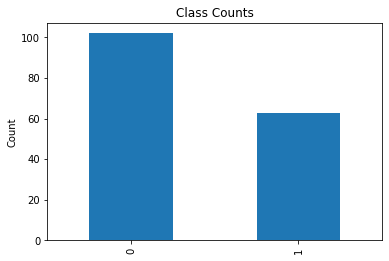

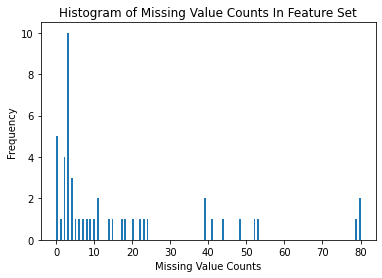

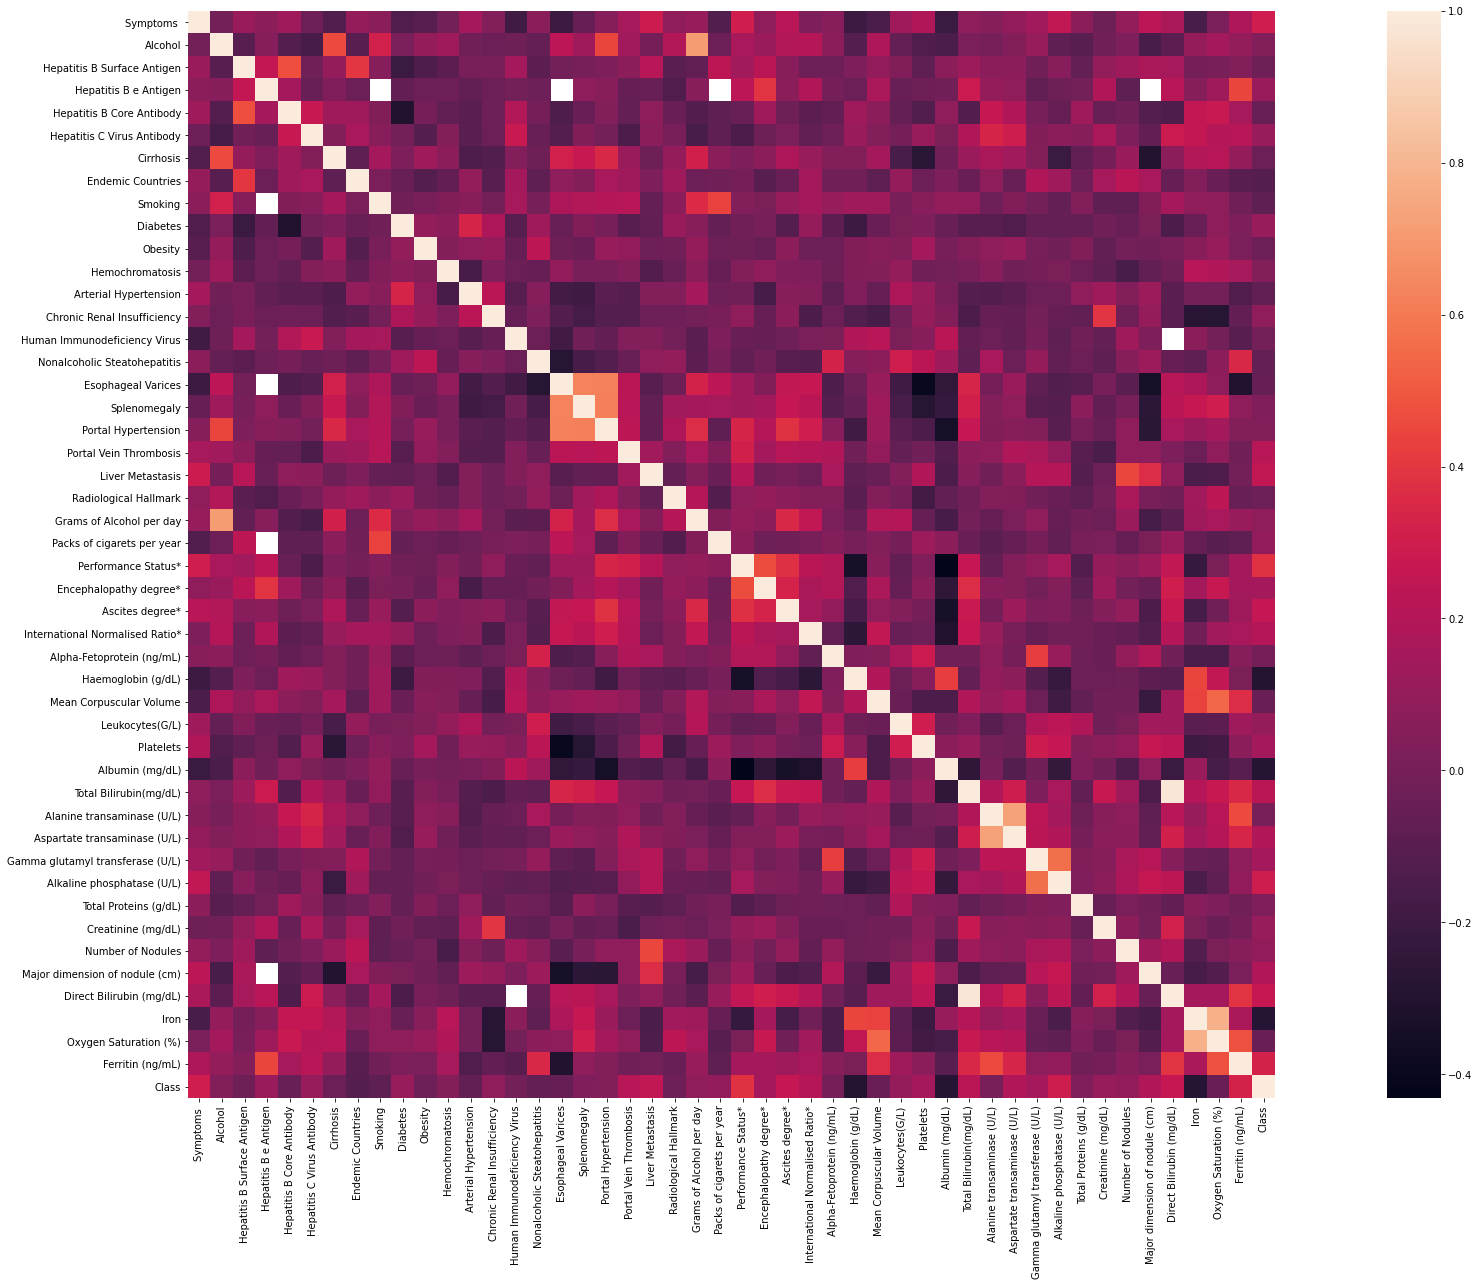

Plotting top significant 20 features.
###################################################
Significant Univariate Associations:
Alkaline phosphatase (U/L): (p-val = 3.5403912777218106e-06)
Iron: (p-val = 3.5423866432400713e-06)
Alpha-Fetoprotein (ng/mL): (p-val = 1.0082106490397668e-05)
Haemoglobin (g/dL): (p-val = 1.3037749087103508e-05)
Performance Status*: (p-val = 3.2548676278782114e-05)
Oxygen Saturation (%): (p-val = 3.998706534072513e-05)
Albumin (mg/dL): (p-val = 5.159435074542993e-05)
Symptoms : (p-val = 0.0006092985105592953)
Aspartate transaminase (U/L): (p-val = 0.002884797765802902)
Liver Metastasis: (p-val = 0.002993588224869906)
Ascites degree*: (p-val = 0.0038134308539161175)
Ferritin (ng/mL): (p-val = 0.004446494113520735)
Portal Vein Thrombosis: (p-val = 0.01174304115542567)
Major dimension of nodule (cm): (p-val = 0.01569067499758109)
Gamma glutamyl transferase (U/L): (p-val = 0.02438867167652392)
Total Proteins (g/dL): (p-val = 0.029520535772105137)
Encephalopathy de

18

19

27

18

17

23

38

17

20

21

36

In [7]:
#Determine file extension of datasets in target folder:
file_count = 0
unique_datanames = []
for dataset_path in glob.glob(data_path+'/*'):
    dataset_path = str(dataset_path).replace('\\','/')
    print('---------------------------------------------------------------------------------')
    print(dataset_path)
    file_extension = dataset_path.split('/')[-1].split('.')[-1]
    data_name = dataset_path.split('/')[-1].split('.')[0] #Save unique dataset names so that analysis is run only once if there is both a .txt and .csv version of dataset with same name.
    if file_extension == 'txt' or file_extension == 'csv':
        if data_name not in unique_datanames:
            unique_datanames.append(data_name)
            ExploratoryAnalysisJob.runExplore(dataset_path,output_path+'/'+experiment_name,cv_partitions,partition_method,categorical_cutoff,export_exploratory_analysis,export_feature_correlations,export_univariate_plots,class_label,instance_label,match_label,random_state,ignore_features,categorical_feature_headers,sig_cutoff,jupyterRun)
            file_count += 1

if file_count == 0: #Check that there was at least 1 dataset
    raise Exception("There must be at least one .txt or .csv dataset in data_path directory")
    
with open(output_path+'/'+experiment_name+'/'+'metadata.csv',mode='w', newline="") as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(["DATA LABEL", "VALUE"])
    writer.writerow(["class label",class_label])
    writer.writerow(["instance label", instance_label])
    writer.writerow(["match label", match_label])
    writer.writerow(["random state",random_state])
    writer.writerow(["categorical cutoff",categorical_cutoff])
    writer.writerow(["statistical significance cutoff",sig_cutoff])
    writer.writerow(["cv partitions",cv_partitions])
    writer.writerow(["partition method",partition_method])
    writer.writerow(["ignored features",ignore_features])
    writer.writerow(["specified categorical variables",categorical_feature_headers])

file.close()

## Phase 2: Data Preprocessing

### Phase 2 Import Additional Python Packages

In [8]:
import DataPreprocessingJob

### Phase 2 Set Run Parameters

In [9]:
scale_data = 'True' #perform data scaling?
impute_data = 'True' # perform missing value data imputation? (required for most ML algorithms if missing data is present)
overwrite_cv = 'False' # overwrites earlier cv datasets with new scaled/imputed ones

### Phase 2 Conduct Data Preprocessing

In [10]:
dataset_paths = os.listdir(output_path+"/"+experiment_name)
dataset_paths.remove('metadata.csv')
for dataset_directory_path in dataset_paths:
    full_path = output_path+"/"+experiment_name+"/"+dataset_directory_path
    for cv_train_path in glob.glob(full_path+"/CVDatasets/*Train.csv"):
        cv_train_path = str(cv_train_path).replace('\\','/')
        cv_test_path = cv_train_path.replace("Train.csv","Test.csv")
        DataPreprocessingJob.runProcess(cv_train_path,cv_test_path,output_path+'/'+experiment_name,scale_data,impute_data,overwrite_cv,categorical_cutoff,class_label,instance_label,random_state,categorical_feature_headers)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values
if metadata.shape[0] == 10: #Only update if metadata below hasn't been added before (i.e. in a previous phase 2 run)
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv',mode='a', newline="") as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["data scaling",scale_data])
        writer.writerow(["data imputation",impute_data])
    file.close()

hcc-data_example phase 2 complete
hcc-data_example phase 2 complete
hcc-data_example phase 2 complete
hcc-data_example_no_covariates phase 2 complete
hcc-data_example_no_covariates phase 2 complete
hcc-data_example_no_covariates phase 2 complete


19

22

## Phase 3 Feature Importance Evaluation

### Phase 3 Import Additional Python Packages

In [11]:
import FeatureImportanceJob

### Phase 3 Set Run Parameters

In [12]:
do_mutual_info = 'True' #do mutual information analysis
do_multisurf = 'True' #do multiSURF analysis
use_TURF = 'False' # use TURF wrapper around MultiSURF
TURF_pct = 0.5 # proportion of instances removed in an iteration (also dictates number of iterations)
njobs = -1 #number of cores dedicated to running algorithm; setting to -1 will use all available cores
instance_subset = 2000 #sample subset size to use with multiSURF

### Phase 3 Conduct Feature Importance Evaluation

In [13]:
dataset_paths = os.listdir(output_path+"/"+experiment_name)
dataset_paths.remove('metadata.csv')
dataset_paths.remove('jobsCompleted')
for dataset_directory_path in dataset_paths:
    full_path = output_path+"/"+experiment_name+"/"+dataset_directory_path
    experiment_path = output_path+'/'+experiment_name

    if eval(do_mutual_info):
        if not os.path.exists(full_path+"/mutualinformation"):
            os.mkdir(full_path+"/mutualinformation")
        for cv_train_path in glob.glob(full_path+"/CVDatasets/*_CV_*Train.csv"):
            cv_train_path = str(cv_train_path).replace('\\','/')
            FeatureImportanceJob.job(cv_train_path,experiment_path,random_state,class_label,instance_label,instance_subset,'mi',njobs,use_TURF,TURF_pct)

    if eval(do_multisurf):
        if not os.path.exists(full_path+"/multisurf"):
            os.mkdir(full_path+"/multisurf")
        for cv_train_path in glob.glob(full_path+"/CVDatasets/*_CV_*Train.csv"):
            cv_train_path = str(cv_train_path).replace('\\','/')
            FeatureImportanceJob.job(cv_train_path,experiment_path,random_state,class_label,instance_label,instance_subset,'ms',njobs,use_TURF,TURF_pct)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values        
if metadata.shape[0] == 12: #Only update if metadata below hasn't been added before (i.e. in a previous phase 2 run)
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv',mode='a', newline="") as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["mutual information",do_mutual_info])
        writer.writerow(["MultiSURF", do_multisurf])
        writer.writerow(["TURF",use_TURF])
        writer.writerow(["TURF cutoff", TURF_pct])
        writer.writerow(["MultiSURF instance subset", instance_subset])
    file.close()

hcc-data_example CV0 phase 3 mutualinformation evaluation complete
hcc-data_example CV1 phase 3 mutualinformation evaluation complete
hcc-data_example CV2 phase 3 mutualinformation evaluation complete
hcc-data_example CV0 phase 3 multisurf evaluation complete
hcc-data_example CV1 phase 3 multisurf evaluation complete
hcc-data_example CV2 phase 3 multisurf evaluation complete
hcc-data_example_no_covariates CV0 phase 3 mutualinformation evaluation complete
hcc-data_example_no_covariates CV1 phase 3 mutualinformation evaluation complete
hcc-data_example_no_covariates CV2 phase 3 mutualinformation evaluation complete
hcc-data_example_no_covariates CV0 phase 3 multisurf evaluation complete
hcc-data_example_no_covariates CV1 phase 3 multisurf evaluation complete
hcc-data_example_no_covariates CV2 phase 3 multisurf evaluation complete


25

16

12

17

32

## Phase 4 Feature Selection

### Phase 4 Import Additional Python Packages

In [14]:
import FeatureSelectionJob

### Phase 4 Set Run Parameters

In [15]:
max_features_to_keep = 2000 # max features to keep. None if no max
filter_poor_features = 'True' # filter out the worst performing features prior to modeling
top_results = 20 #number of top features to illustrate in figures
export_scores = 'True' #export figure summarizing average feature importance scores over cv partitions

### Phase 4 Conduct Feature Selection

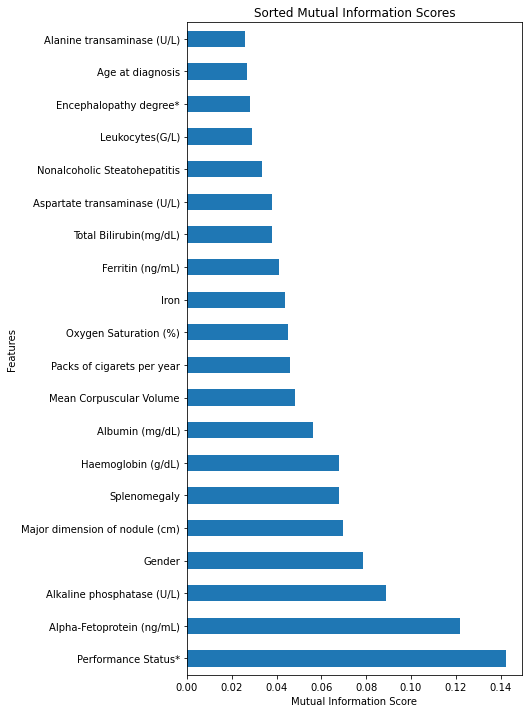

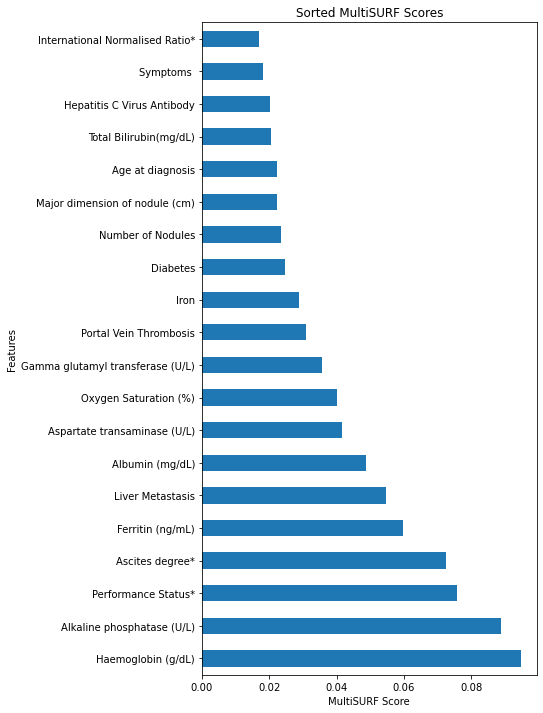

hcc-data_example phase 4 complete


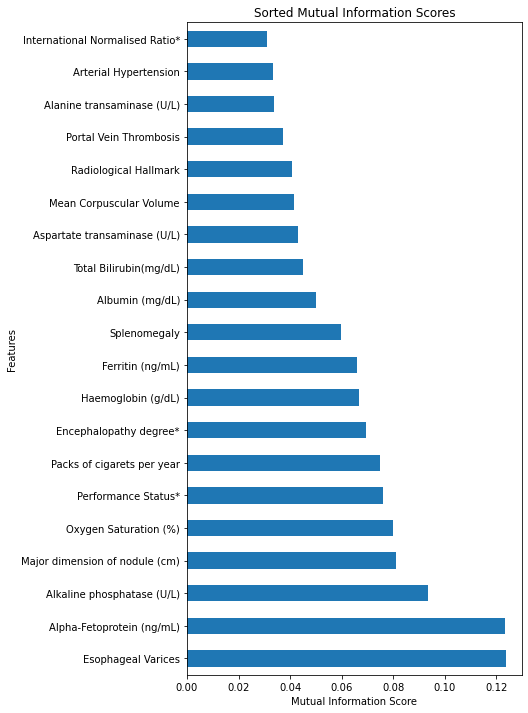

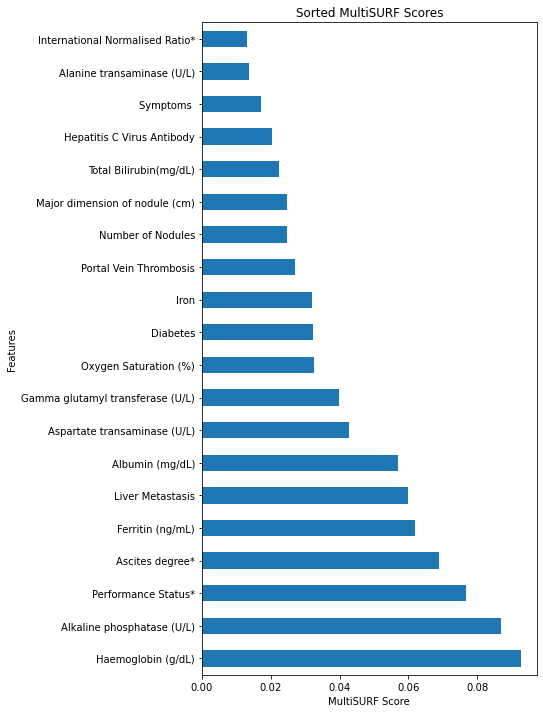

hcc-data_example_no_covariates phase 4 complete


27

27

In [16]:
dataset_paths = os.listdir(output_path + "/" + experiment_name)
dataset_paths.remove('metadata.csv')
dataset_paths.remove('jobsCompleted')
for dataset_directory_path in dataset_paths:
    full_path = output_path + "/" + experiment_name + "/" + dataset_directory_path
    FeatureSelectionJob.job(full_path,do_mutual_info,do_multisurf,max_features_to_keep,filter_poor_features,top_results,export_scores,class_label,instance_label,cv_partitions,overwrite_cv,jupyterRun)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values
if metadata.shape[0] == 17: #Only update if metadata below hasn't been added before
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv',mode='a', newline="") as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["max features to keep",max_features_to_keep])
        writer.writerow(["filter poor features", filter_poor_features])
    file.close()

## Phase 5 ML Modeling

### Phase 5 Import Additional Python Packages

In [17]:
import ModelJob

### Phase 5 Set Run Parameters

In [18]:
#ML Model Algorithm Options (individual hyperparameter options can be adjusted below)
do_NB = 'True'       #run naive bayes modeling
do_LR = 'True'       #run logistic regression modeling
do_DT = 'True'     #run decision tree modeling
do_RF = 'False'       #run random forest modeling
do_GB = 'False'       #run k-neighbors classifier modeling
do_XGB = 'False'      #run XGBoost modeling
do_LGB = 'False'     #run LGBoost modeling
do_SVM = 'False'     #run support vector machine modeling
do_ANN = 'False'      #run artificial neural network modeling
do_KN = 'False'       #run gradient boosting modeling
do_eLCS = 'False'     #run eLCS modeling (a basic supervised-learning learning classifier system)
do_XCS = 'False'      #run XCS modeling (a supervised-learning-only implementation of the best studied learning classifier system)
do_ExSTraCS = 'False' #run ExSTraCS modeling (a learning classifier system designed for biomedical data mining)

#Other Analysis Parameters
training_subsample = 0  #for long running algos, option to subsample training set (0 for no subsample) Limit Sample Size Used to train algorithms that do not scale up well in large instance spaces (i.e. XGB,SVM,KN,ANN,and LR to a lesser degree) and depending on 'instances' settings, ExSTraCS, eLCS, and XCS)
use_uniform_FI = 'False' #overides use of any available feature importances estimate methods from models, instead using permutation_importance uniformly
primary_metric = 'balanced_accuracy'

#Hyperparameter Sweep Options
n_trials = 100   #number of bayesian hyperparameter optimization trials using optuna
timeout = 300    #seconds until hyperparameter sweep stops running new trials (Note: it may run longer to finish last trial started)
export_hyper_sweep_plots = 'True' #Export hyper parameter sweep plots from optuna

#Learning classifier system specific options (ExSTraCS, eLCS, XCS)
do_lcs_sweep = 'False' #do LCS hyperparam tuning or use below params
nu = 1               #fixed LCS nu param
iterations = 200000  #fixed LCS # learning iterations param
N = 2000             #fixed LCS rule population maximum size param
lcs_timeout = 1200 #seconds until hyperparameter sweep stops for LCS algorithms (evolutionary algorithms often require more time for a single run)

In [19]:
def hyperparameters(random_state,do_lcs_sweep,nu,iterations,N):
    param_grid = {}
    #######EDITABLE CODE################################################################################################
    # Naive Bayes - no hyperparameters
    
    # Logistic Regression - can take a longer while in larger instance spaces
    param_grid_LR = {'penalty': ['l2', 'l1'],'C': [1e-5, 1e5],'dual': [True, False],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'class_weight': [None, 'balanced'],'max_iter': [10, 1000],
                     'random_state':[random_state]}
    # Decision Tree
    param_grid_DT = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'],'max_depth': [1, 30],
                     'min_samples_split': [2, 50],'min_samples_leaf': [1, 50],'max_features': [None, 'auto', 'log2'],
                     'class_weight': [None, 'balanced'],
                     'random_state':[random_state]}
    # Random Forest
    param_grid_RF = {'n_estimators': [10, 1000],'criterion': ['gini', 'entropy'],'max_depth': [1, 30],
                     'min_samples_split': [2, 50],'min_samples_leaf': [1, 50],'max_features': [None, 'auto', 'log2'],
                     'bootstrap': [True],'oob_score': [False, True],'class_weight': [None, 'balanced'],
                     'random_state':[random_state]}
    # GB
    param_grid_GB = {'n_estimators': [10, 1000],'loss': ['deviance', 'exponential'], 'learning_rate': [.0001, 0.3], 
                     'min_samples_leaf': [1, 50],'min_samples_split': [2, 50], 'max_depth': [1, 30],
                     'random_state':[random_state]}
    # XG Boost - not great for large instance spaces (limited completion). note: class weight balance is included as option internally
    param_grid_XGB = {'booster': ['gbtree'],'objective': ['binary:logistic'],'verbosity': [0],'reg_lambda': [1e-8, 1.0],
                      'alpha': [1e-8, 1.0],'eta': [1e-8, 1.0],'gamma': [1e-8, 1.0],'max_depth': [1, 30],
                      'grow_policy': ['depthwise', 'lossguide'],'n_estimators': [10, 1000],'min_samples_split': [2, 50],
                      'min_samples_leaf': [1, 50],'subsample': [0.5, 1.0],'min_child_weight': [0.1, 10],
                      'colsample_bytree': [0.1, 1.0],'nthread':[1],'random_state':[random_state]}

    # LG Boost - note: class weight balance is included as option internally (still takes a while on large instance spaces)
    param_grid_LGB = {'objective': ['binary'],'metric': ['binary_logloss'],'verbosity': [-1],'boosting_type': ['gbdt'],
                      'num_leaves': [2, 256],'max_depth': [1, 30],'lambda_l1': [1e-8, 10.0],'lambda_l2': [1e-8, 10.0],
                      'feature_fraction': [0.4, 1.0],'bagging_fraction': [0.4, 1.0],'bagging_freq': [1, 7],
                      'min_child_samples': [5, 100],'n_estimators': [10, 1000],'num_threads':[1],'random_state':[random_state]}
    # SVM - not approppriate for large instance spaces
    param_grid_SVM = {'kernel': ['linear', 'poly', 'rbf'],'C': [0.1, 1000],'gamma': ['scale'],'degree': [1, 6],
                      'probability': [True],'class_weight': [None, 'balanced'],'random_state':[random_state]}
    # ANN - bad for large instances spaces
    param_grid_ANN = {'n_layers': [1, 3],'layer_size': [1, 100],'activation': ['identity', 'logistic', 'tanh', 'relu'],
                      'learning_rate': ['constant', 'invscaling', 'adaptive'],'momentum': [.1, .9],
                      'solver': ['sgd', 'adam'],'batch_size': ['auto'],'alpha': [0.0001, 0.05],'max_iter': [200],
                      'random_state':[random_state]}
    # KN - not appropriate for large instance spaces
    param_grid_KN = {'n_neighbors': [1, 100], 'weights': ['uniform', 'distance'], 'p': [1, 5],
                     'metric': ['euclidean', 'minkowski']}
    if eval(do_lcs_sweep):
        # eLCS
        param_grid_eLCS = {'learning_iterations': [100000,200000,500000],'N': [1000,2000,5000],'nu': [1,10],
                           'random_state':[random_state]}
        # XCS
        param_grid_XCS = {'learning_iterations': [100000,200000,500000],'N': [1000,2000,5000],'nu': [1,10],
                          'random_state':[random_state]}
        # ExSTraCS
        param_grid_ExSTraCS = {'learning_iterations': [100000,200000,500000],'N': [1000,2000,5000],'nu': [1,10],
                               'random_state':[random_state],'rule_compaction':[None]}
    else:
        # eLCS
        param_grid_eLCS = {'learning_iterations': [iterations], 'N': [N], 'nu': [nu], 'random_state': [random_state]}
        # XCS
        param_grid_XCS = {'learning_iterations': [iterations], 'N': [N], 'nu': [nu], 'random_state': [random_state]}
        # ExSTraCS
        param_grid_ExSTraCS = {'learning_iterations': [iterations], 'N': [N], 'nu': [nu], 'random_state': [random_state], 
                               'rule_compaction': [None]}

    ####################################################################################################################
    param_grid['naive_bayes'] = {}
    param_grid['logistic_regression'] = param_grid_LR
    param_grid['decision_tree'] = param_grid_DT
    param_grid['random_forest'] = param_grid_RF
    param_grid['gradient_boosting'] = param_grid_GB
    param_grid['XGB'] = param_grid_XGB
    param_grid['LGB'] = param_grid_LGB
    param_grid['SVM'] = param_grid_SVM
    param_grid['ANN'] = param_grid_ANN
    param_grid['k_neighbors'] = param_grid_KN
    param_grid['eLCS'] = param_grid_eLCS
    param_grid['XCS'] = param_grid_XCS
    param_grid['ExSTraCS'] = param_grid_ExSTraCS
    return param_grid

In [20]:
#Constructs the list of algorithms that will be run
algorithms = []
if eval(do_NB):
    algorithms.append('naive_bayes')
if eval(do_LR):
    algorithms.append("logistic_regression")
if eval(do_DT):
    algorithms.append("decision_tree")
if eval(do_RF):
    algorithms.append('random_forest')
if eval(do_GB):
    algorithms.append('gradient_boosting')
if eval(do_XGB):
    algorithms.append('XGB')
if eval(do_LGB):
    algorithms.append('LGB')
if eval(do_SVM):
    algorithms.append('SVM')
if eval(do_ANN):
    algorithms.append('ANN')
if eval(do_KN):
    algorithms.append('k_neighbors')
if eval(do_eLCS):
    algorithms.append('eLCS')
if eval(do_XCS):
    algorithms.append('XCS')
if eval(do_ExSTraCS):
    algorithms.append('ExSTraCS')


### Phase 5 Conduct ML Modeling

In [21]:
dataset_paths = os.listdir(output_path + "/" + experiment_name)
dataset_paths.remove('metadata.csv')
dataset_paths.remove('jobsCompleted')
for dataset_directory_path in dataset_paths:
    full_path = output_path + "/" + experiment_name + "/" + dataset_directory_path
    if not os.path.exists(full_path+'/training'):
        os.mkdir(full_path+'/training')
    if not os.path.exists(full_path+'/training/pickledModels'):
        os.mkdir(full_path+'/training/pickledModels')

    for cvCount in range(cv_partitions):
        train_file_path = full_path+'/CVDatasets/'+dataset_directory_path+"_CV_"+str(cvCount)+"_Train.csv"
        test_file_path = full_path + '/CVDatasets/' + dataset_directory_path + "_CV_" + str(cvCount) + "_Test.csv"
        for algorithm in algorithms:
            #Get hyperparameter grid
            param_grid = hyperparameters(random_state,do_lcs_sweep,nu,iterations,N)[algorithm]
            ModelJob.runModel(algorithm,train_file_path,test_file_path,full_path,n_trials,timeout,lcs_timeout,export_hyper_sweep_plots,instance_label,class_label,random_state,cvCount,filter_poor_features,do_lcs_sweep,nu,iterations,N,training_subsample,use_uniform_FI,primary_metric,param_grid)

metadata = pd.read_csv(output_path + '/' + experiment_name + '/' + 'metadata.csv').values
if metadata.shape[0] == 19: #Only update if metadata below hasn't been added before
    with open(output_path + '/' + experiment_name + '/' + 'metadata.csv', mode='a', newline="") as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(["NB", str(do_NB)])
        writer.writerow(["LR", str(do_LR)])
        writer.writerow(["DT", str(do_DT)])
        writer.writerow(["RF", str(do_RF)])
        writer.writerow(["GB",str(do_GB)])
        writer.writerow(["XGB", str(do_XGB)])
        writer.writerow(["LGB", str(do_LGB)])
        writer.writerow(["SVM", str(do_SVM)])
        writer.writerow(["ANN", str(do_ANN)])
        writer.writerow(["KN", str(do_KN)])
        writer.writerow(["eLCS", str(do_eLCS)])
        writer.writerow(["XCS",str(do_XCS)])
        writer.writerow(["ExSTraCS",str(do_ExSTraCS)])
        writer.writerow(["primary metric",primary_metric])
        writer.writerow(["training subsample for KN,ANN,SVM,and XGB",training_subsample])
        writer.writerow(["uniform feature importance estimation (models)",use_uniform_FI])
        writer.writerow(["hypersweep number of trials",n_trials])
        writer.writerow(["hypersweep timeout",timeout])
        writer.writerow(['do LCS sweep',do_lcs_sweep])
        writer.writerow(['nu', nu])
        writer.writerow(['training iterations', iterations])
        writer.writerow(['N (rule population size)', N])
        writer.writerow(["LCS hypersweep timeout",lcs_timeout])
    file.close()

hcc-data_example CV0 phase 5 NB training complete
Best trial:
  Value:  0.7088274044795785
  Params: 
    penalty: l2
    dual: False
    C: 564.0638061927879
    solver: lbfgs
    class_weight: balanced
    max_iter: 616.1049539380961
    random_state: 42
LogisticRegression(C=564.0638061927879, class_weight='balanced',
                   max_iter=616.1049539380961, random_state=42)
hcc-data_example CV0 phase 5 LR training complete
Best trial:
  Value:  0.6597496706192358
  Params: 
    criterion: gini
    splitter: random
    max_depth: 3
    min_samples_split: 41
    min_samples_leaf: 22
    max_features: None
    class_weight: balanced
    random_state: 42
DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=22, min_samples_split=41,
                       random_state=42, splitter='random')
hcc-data_example CV0 phase 5 DT training complete
hcc-data_example CV1 phase 5 NB training complete
Best trial:
  Value:  0.7477884434406173
  Par

9

9

9

10

10

11

11

11

11

10

12

11

16

34

47

54

33

24

20

6

28

31

29

## Phase 6 Statistics (Stats Summaries, Figures, Statistical Comparisons)

### Phase 6 Import Additional Python Packages

In [22]:
import StatsJob

### Phase 6 Set Run Parameters

In [23]:
plot_ROC = 'True' #Plot ROC curves individually for each algorithm including all CV results and averages
plot_PRC = 'True' #Plot PRC curves individually for each algorithm including all CV results and averages
plot_FI_box = 'True' #Plot box plot summaries comparing algorithms for each metric
plot_metric_boxplots = 'True' #Plot feature importance boxplots for each algorithm

### Phase 6 Conduct Statistics

In [24]:
def encode(do_algo,encodedAlgos):
    if eval(do_algo):
        encodedAlgos += '1'
    else:
        encodedAlgos += '0'
    return encodedAlgos

C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example
Naive Bayes


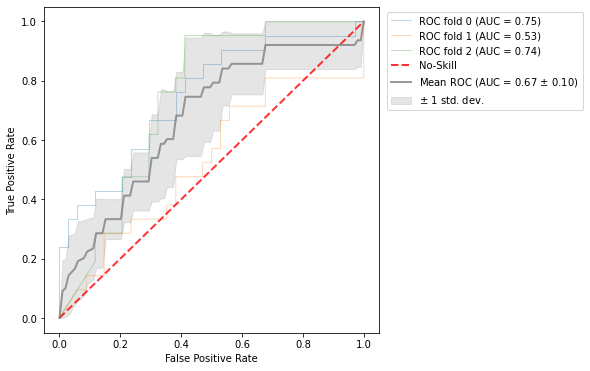

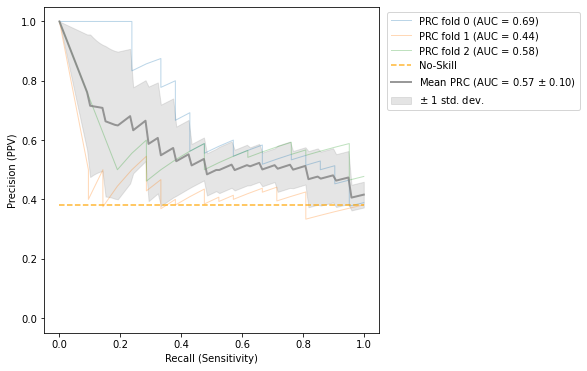

Logistic Regression


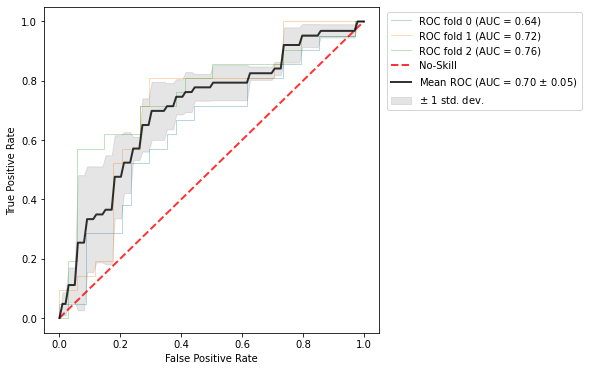

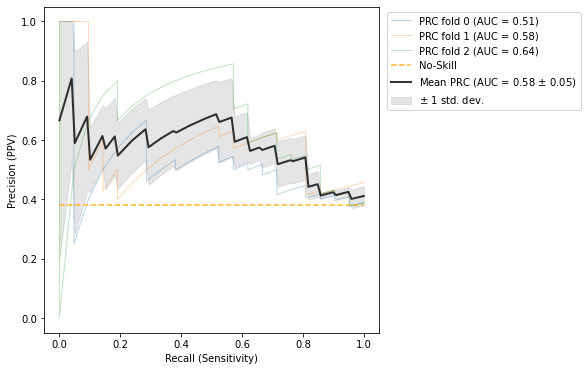

Decision Tree


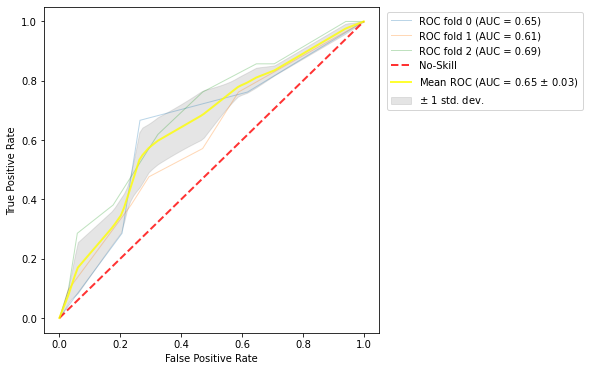

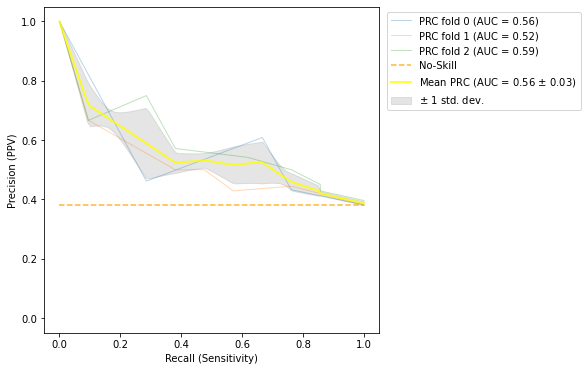

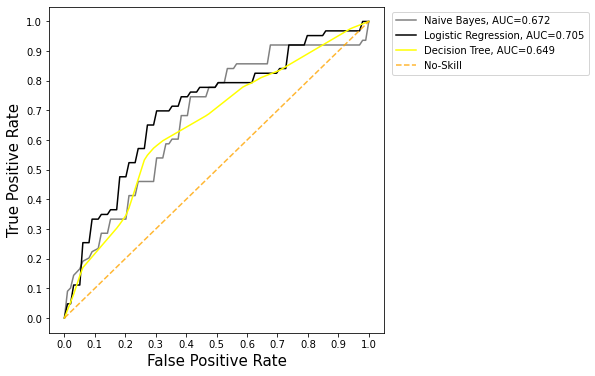

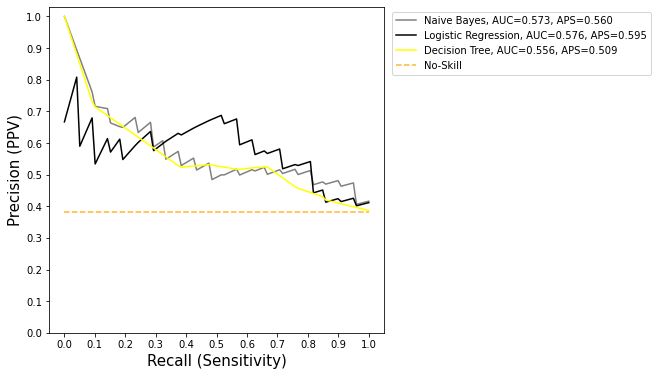

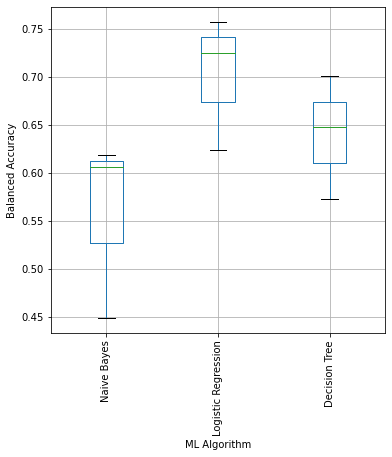

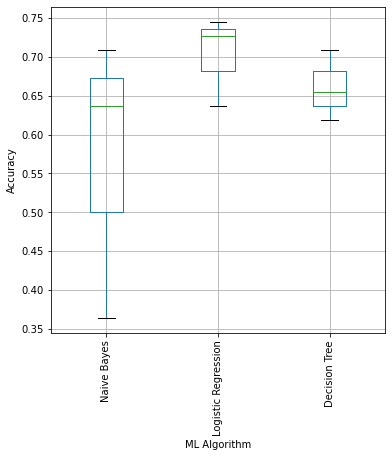

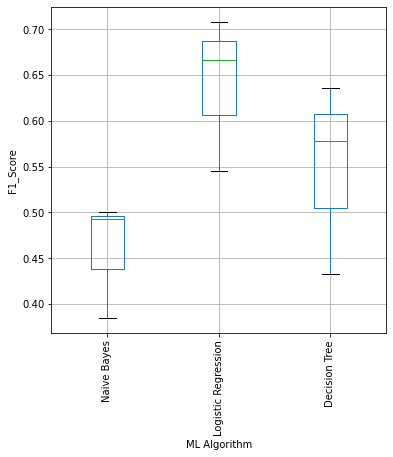

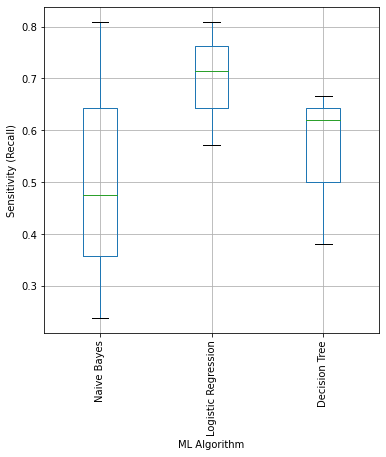

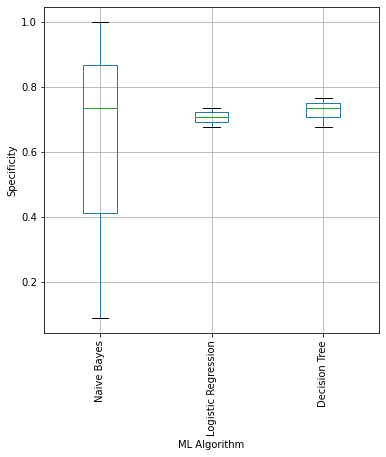

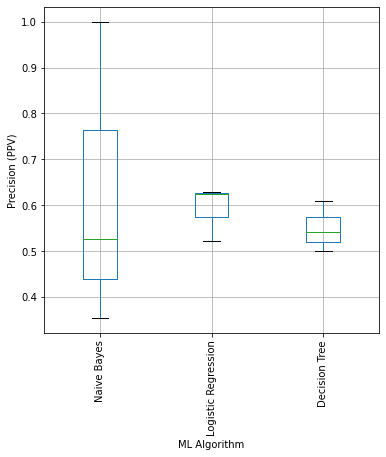

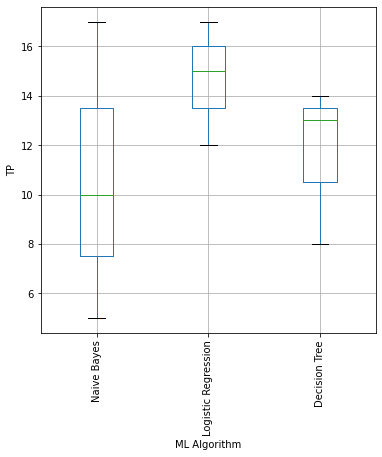

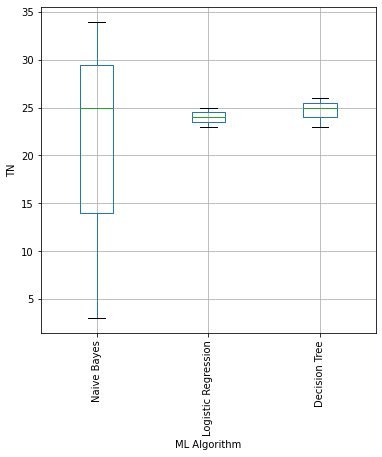

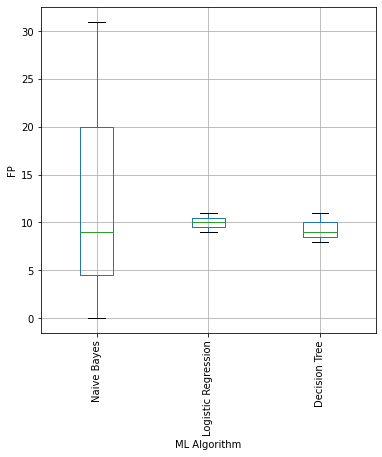

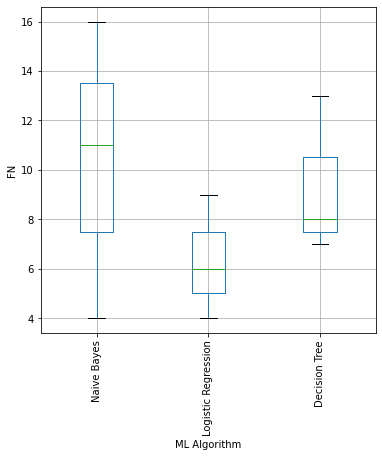

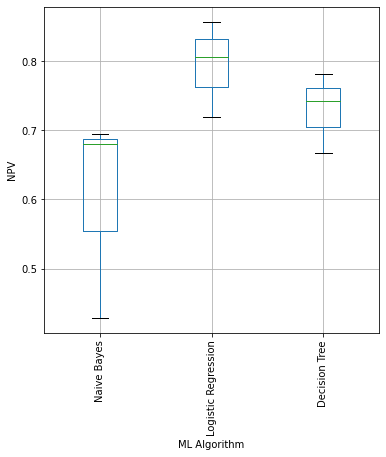

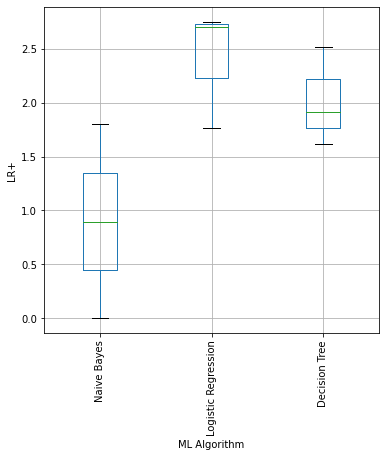

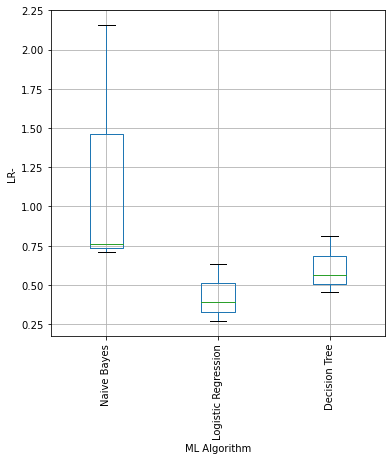

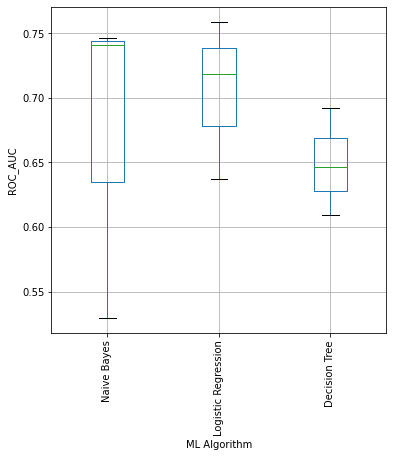

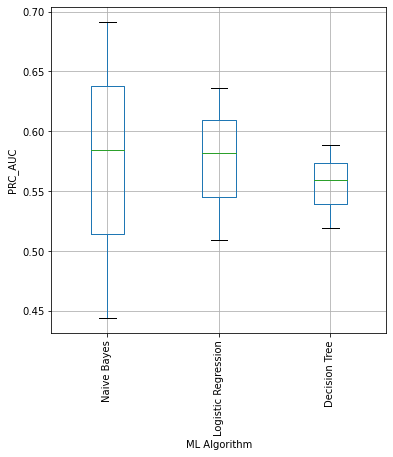

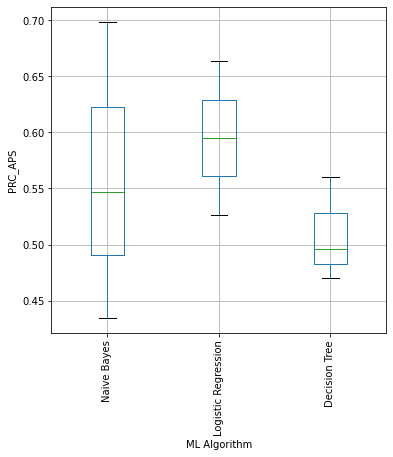

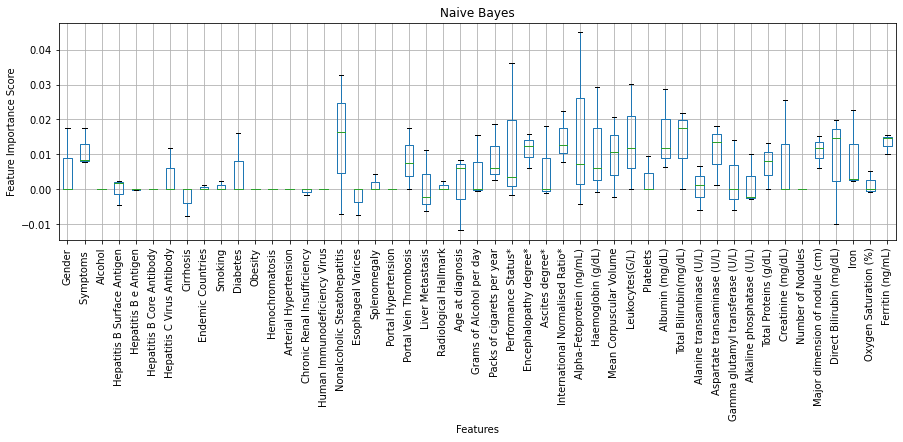

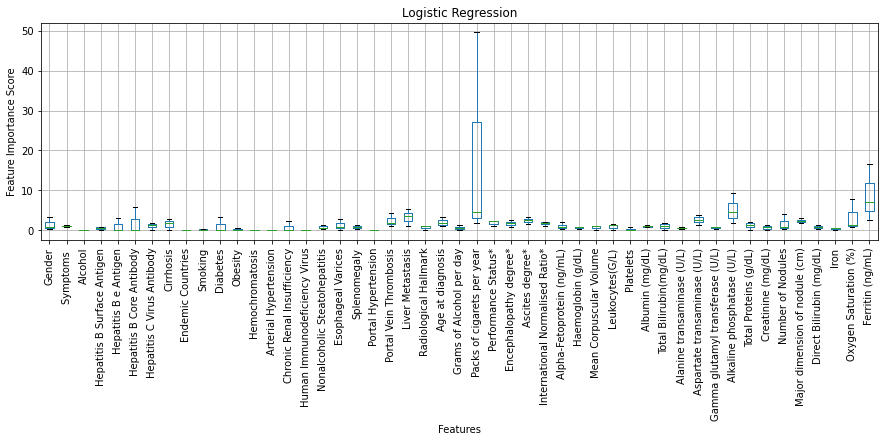

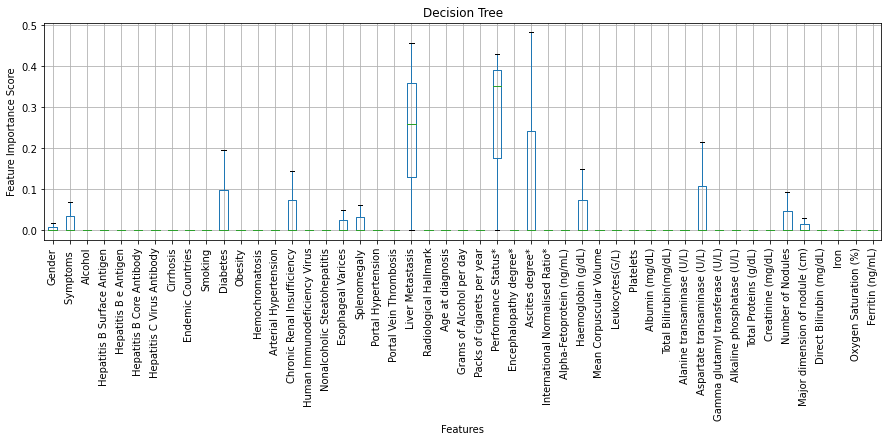

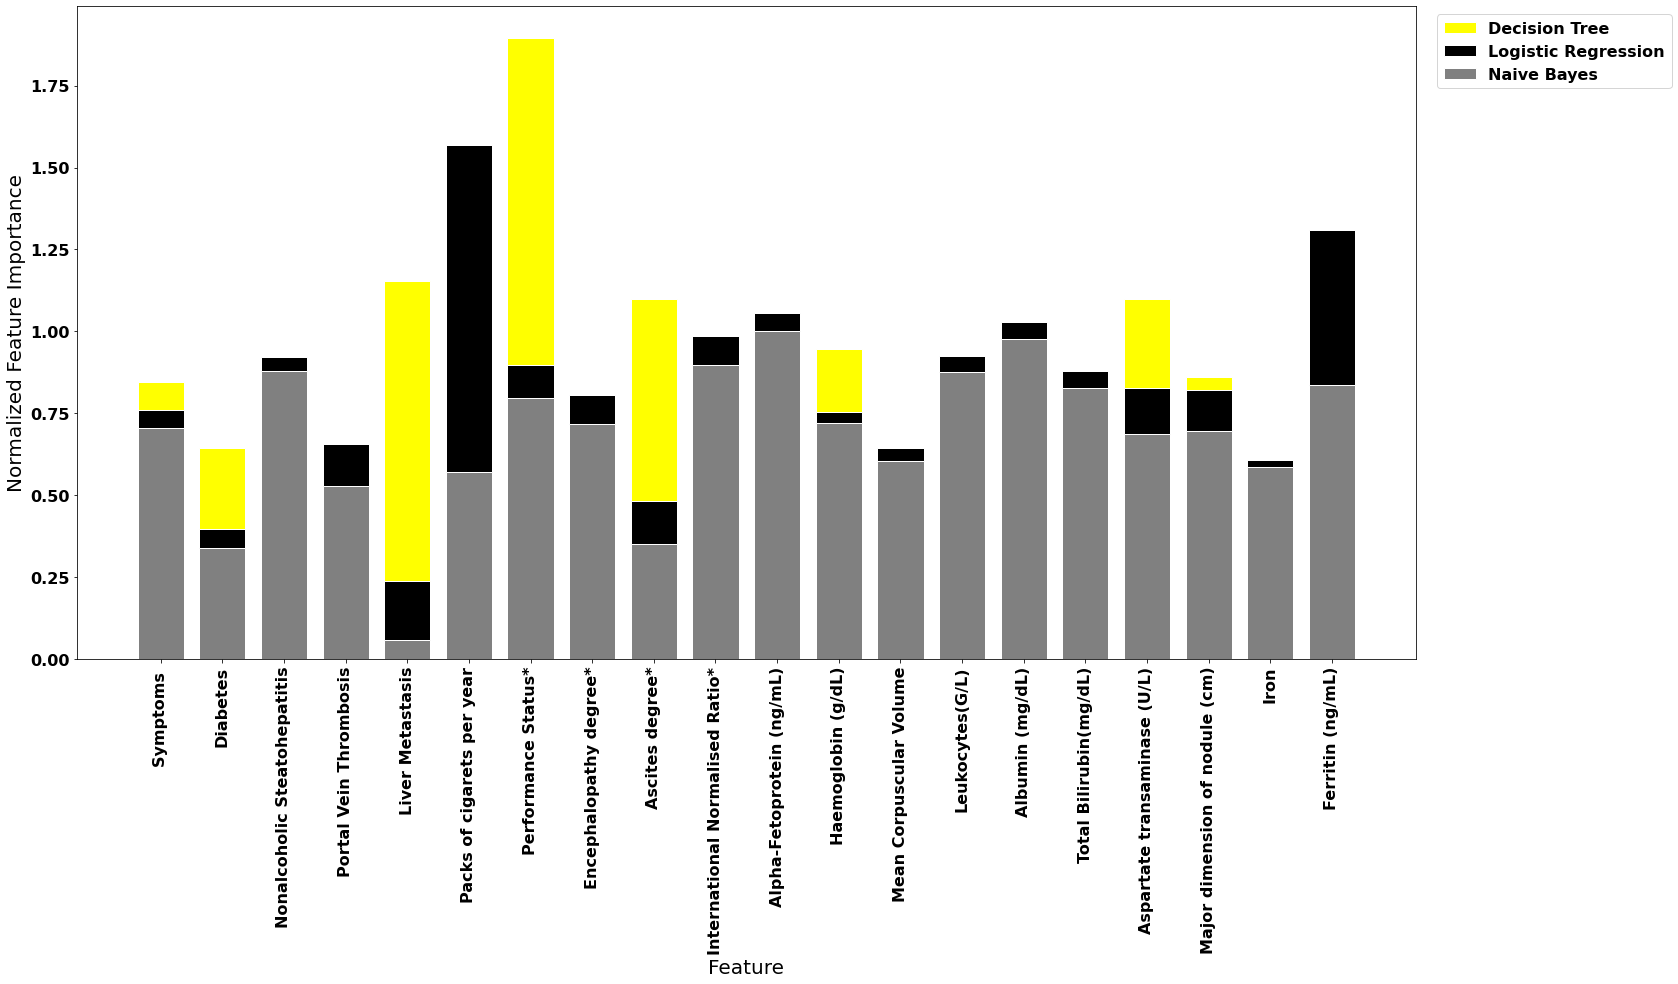

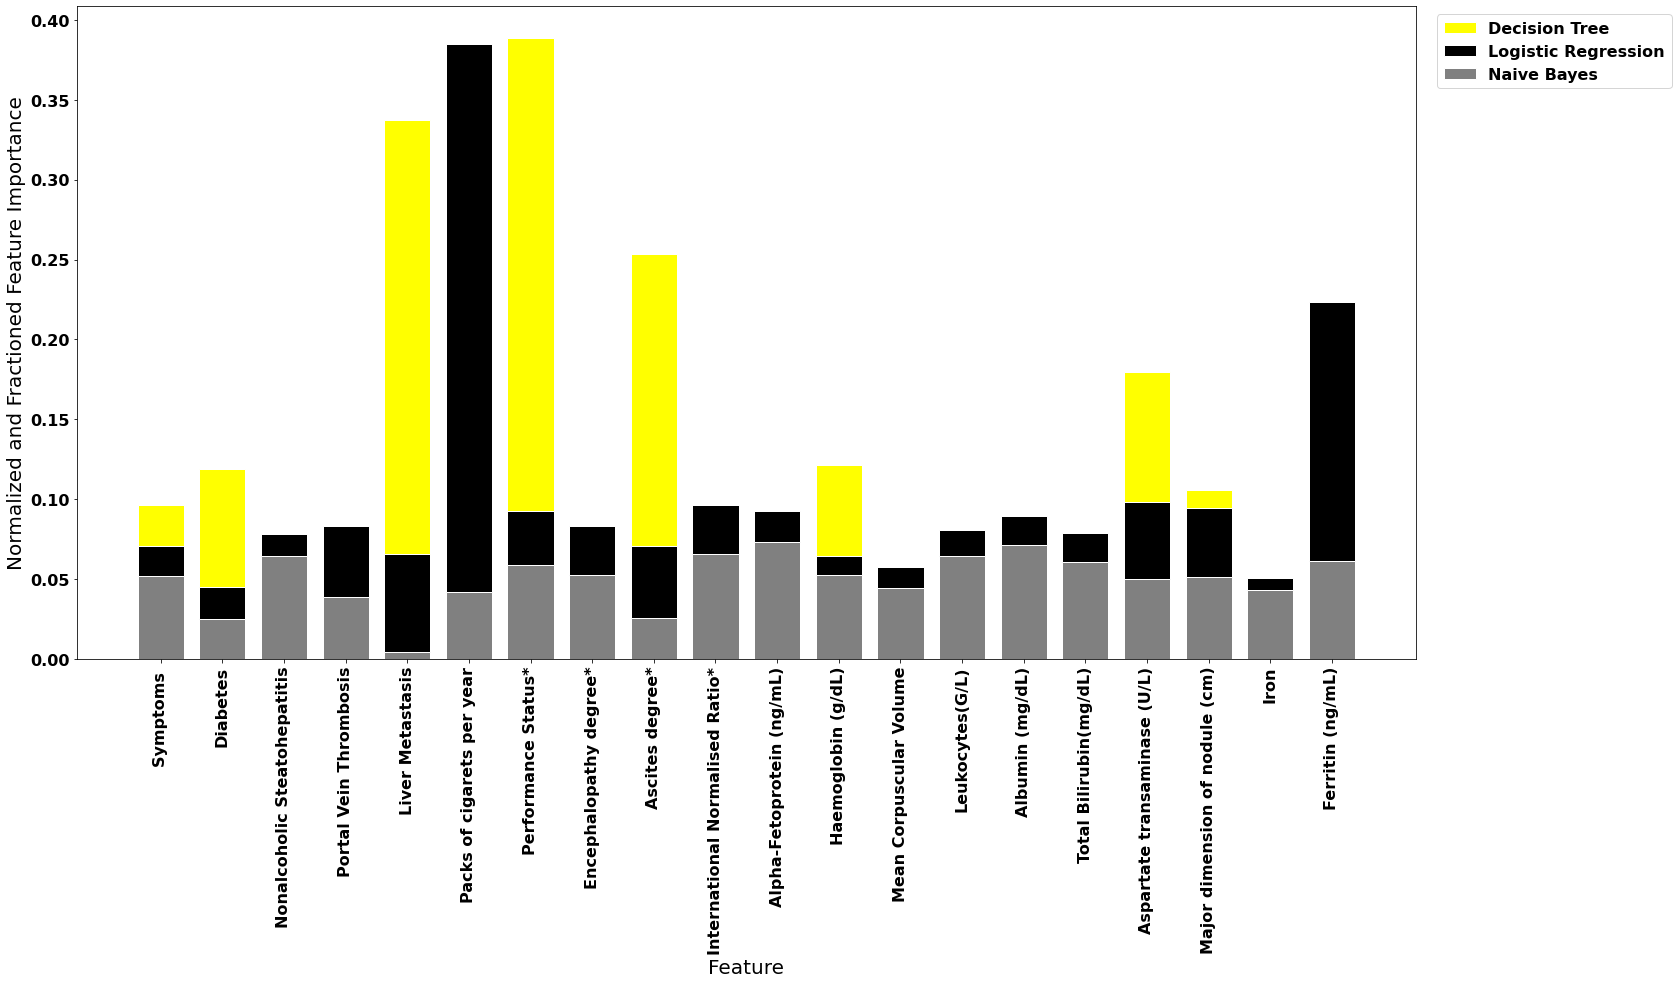

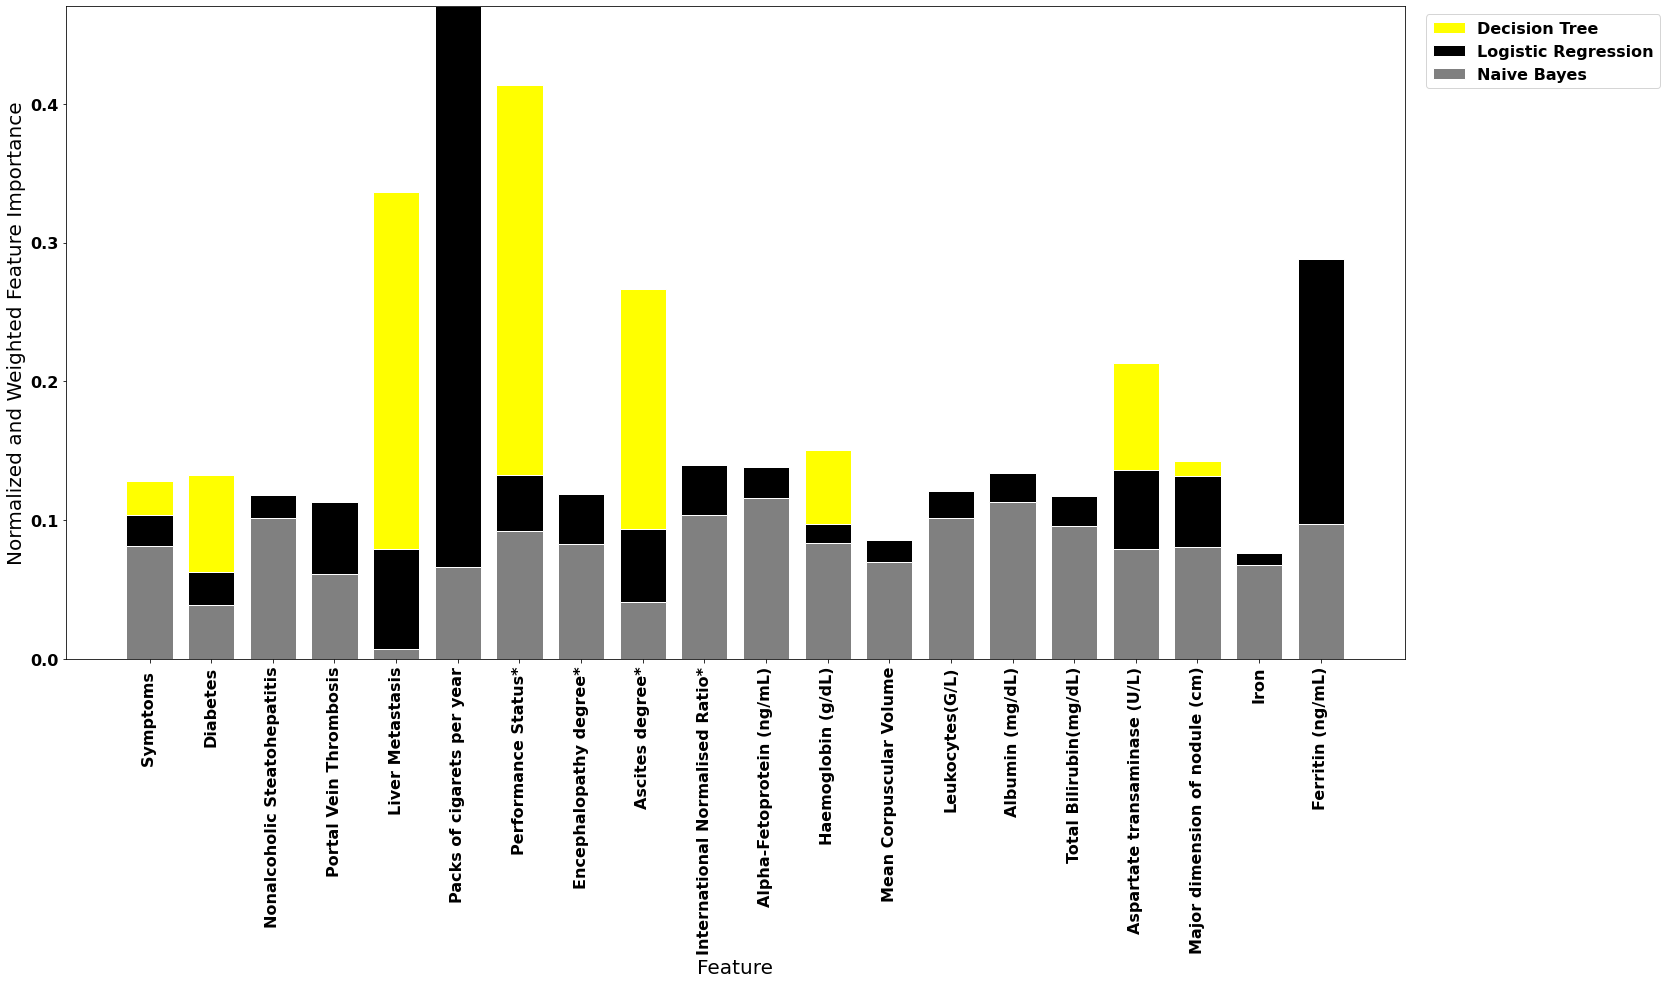

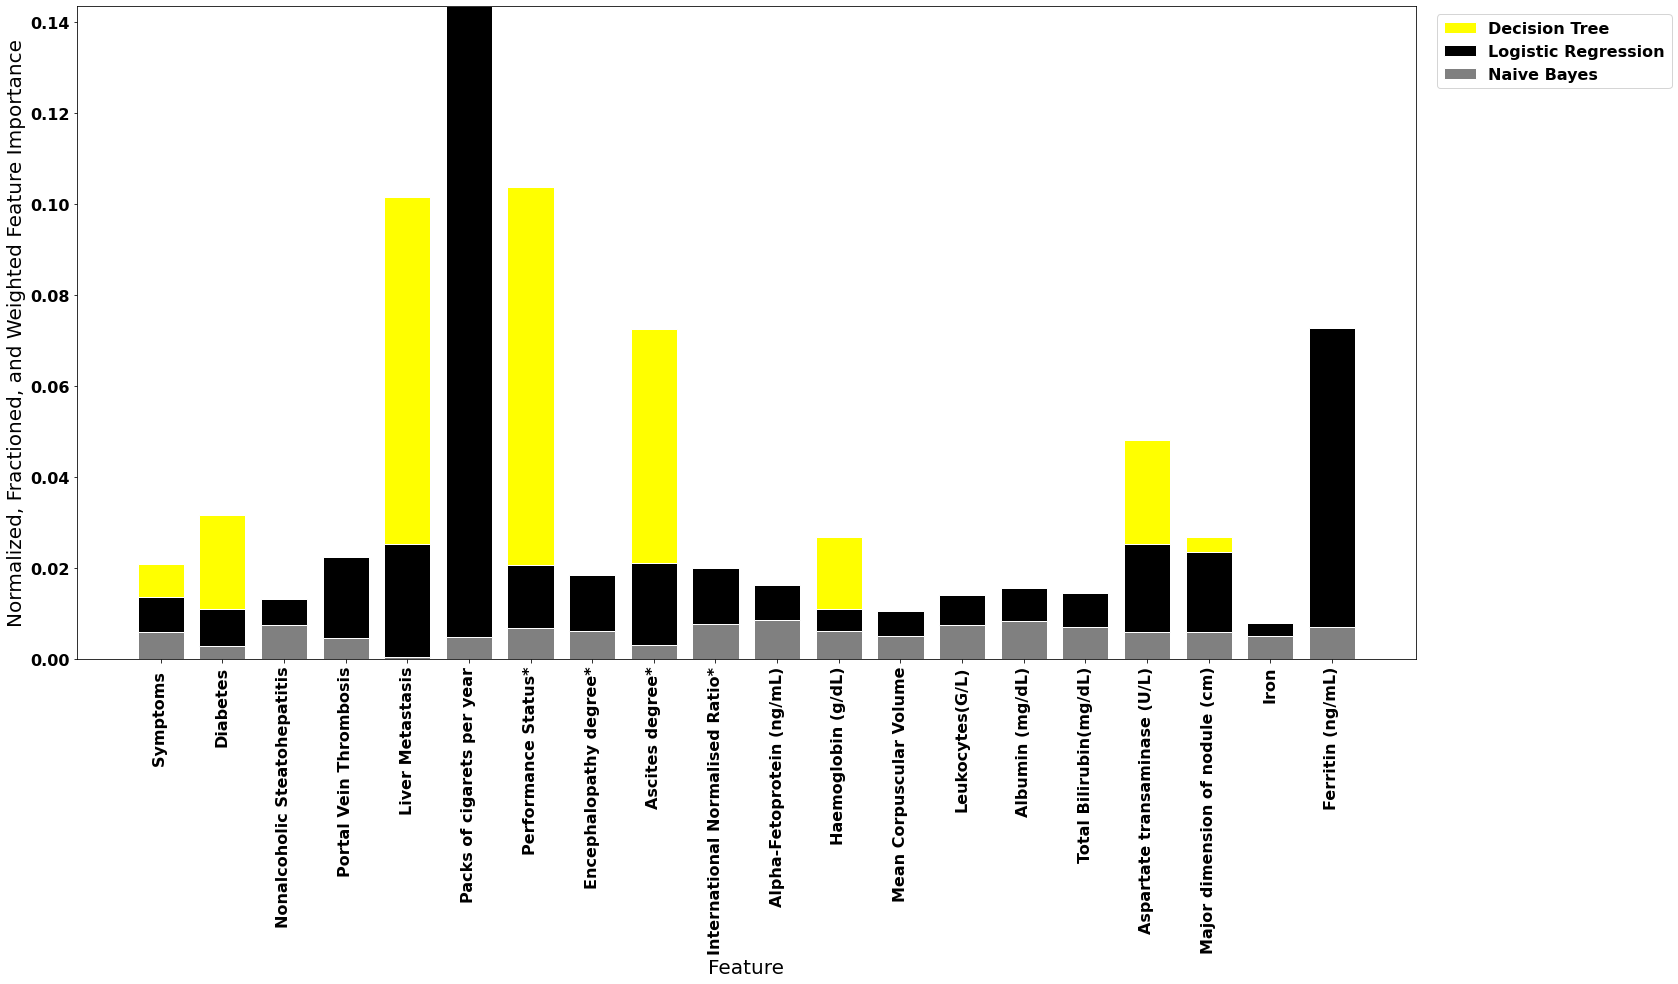

hcc-data_example phase 5 complete
C:/Users/ryanu/Documents/Analysis/AutoMLPipe_Testing/hcc_test/hcc-data_example_no_covariates
Naive Bayes


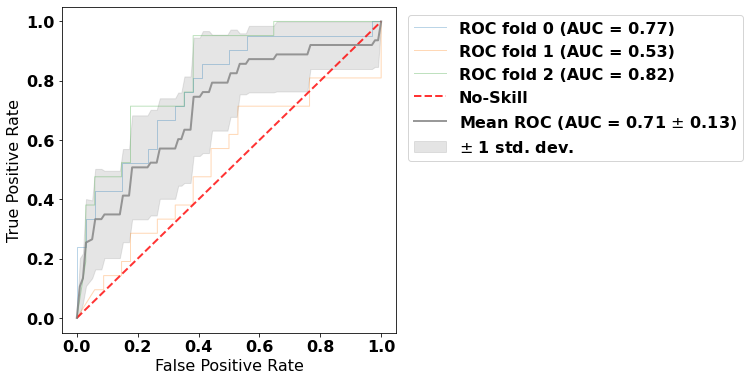

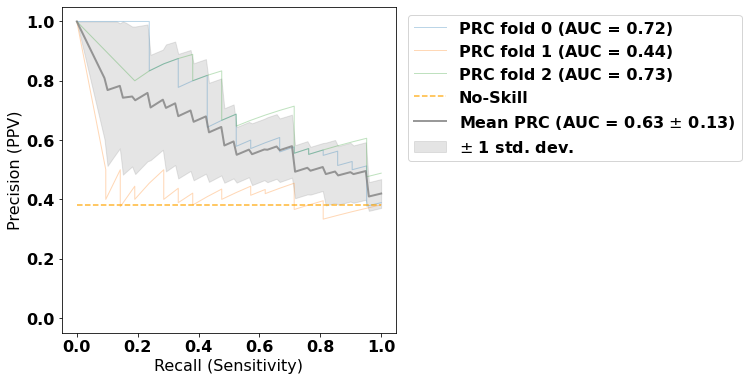

Logistic Regression


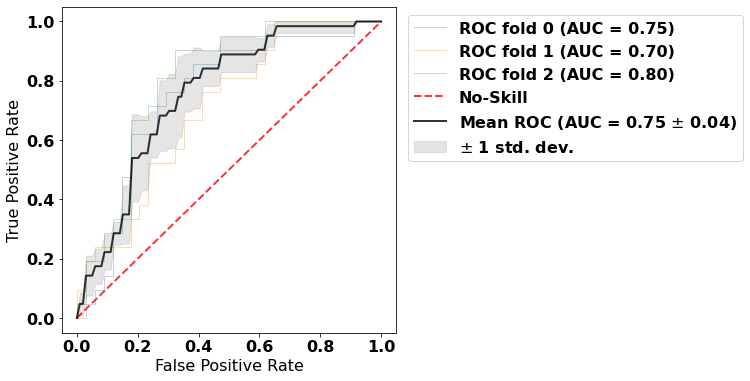

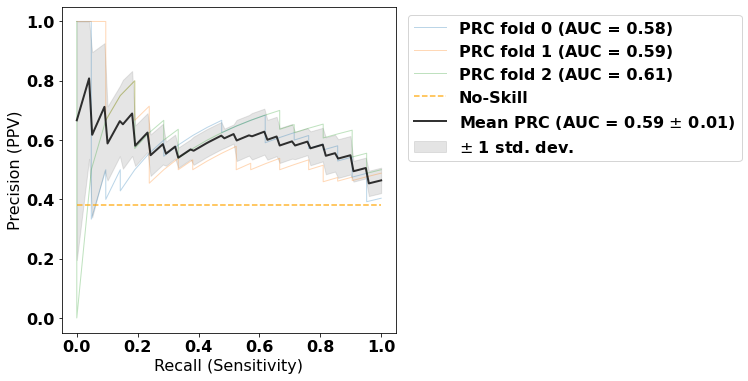

Decision Tree


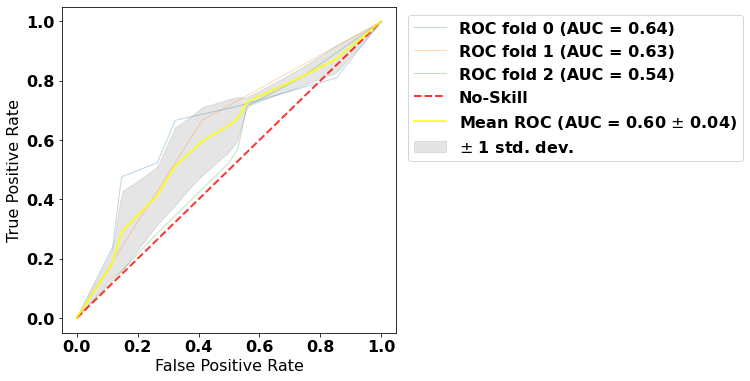

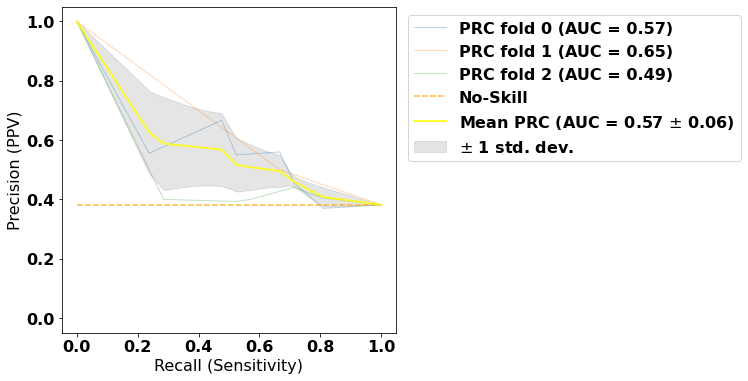

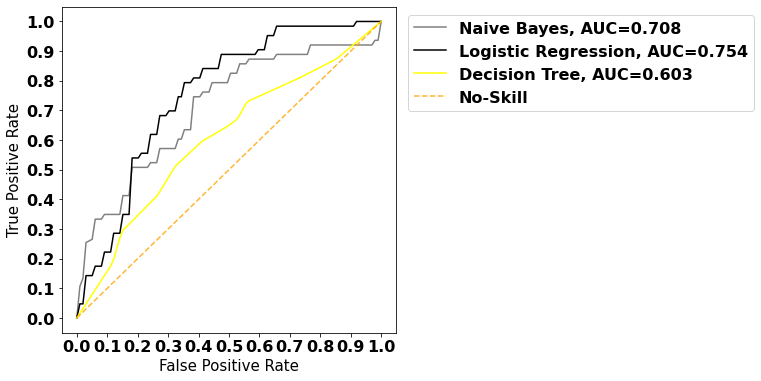

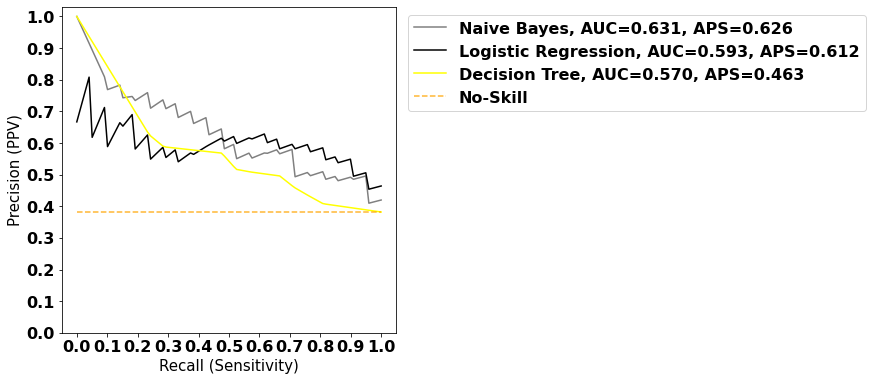

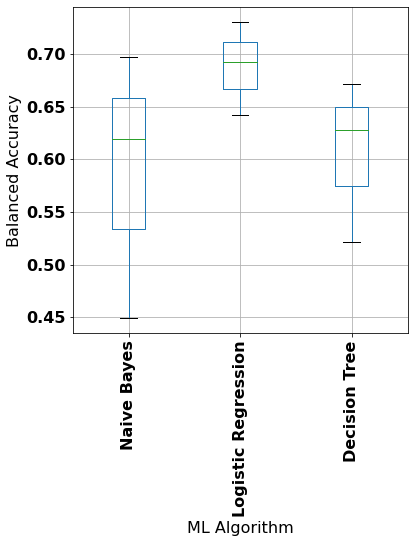

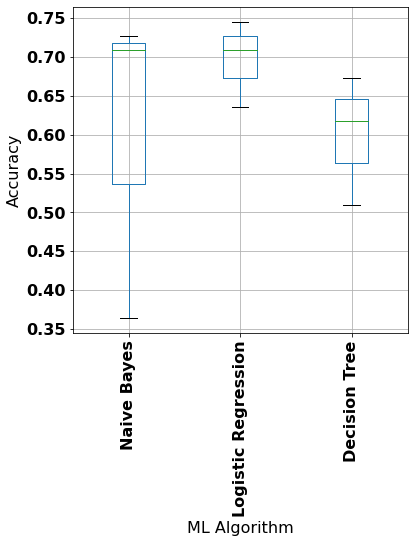

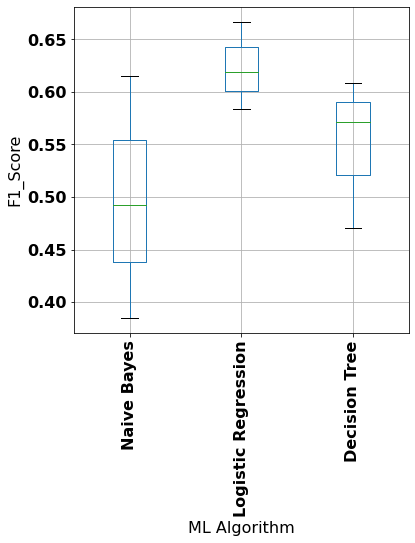

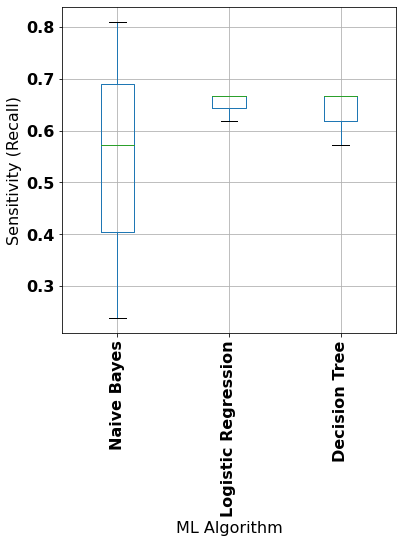

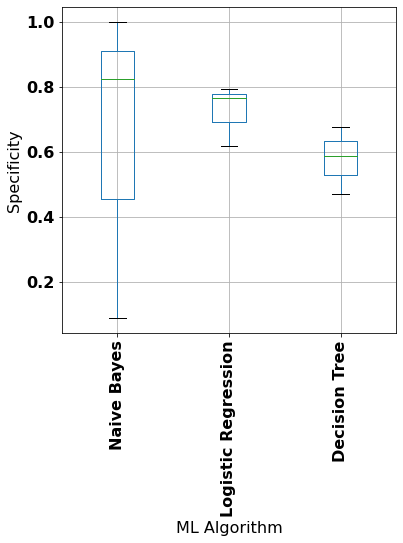

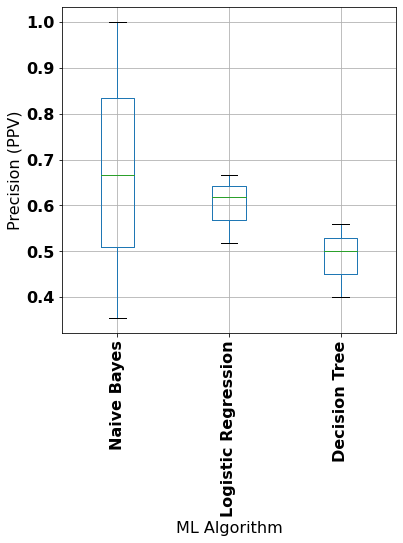

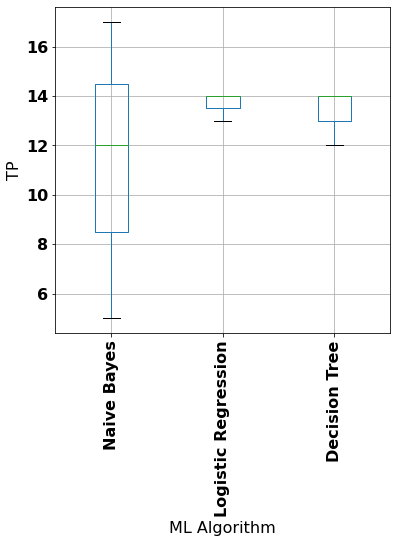

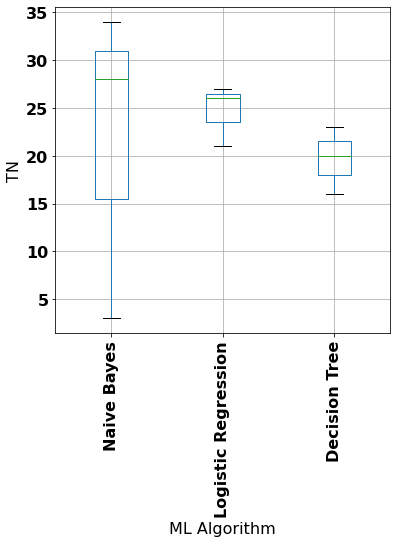

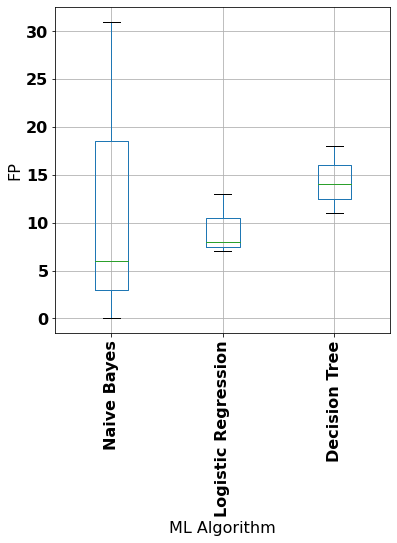

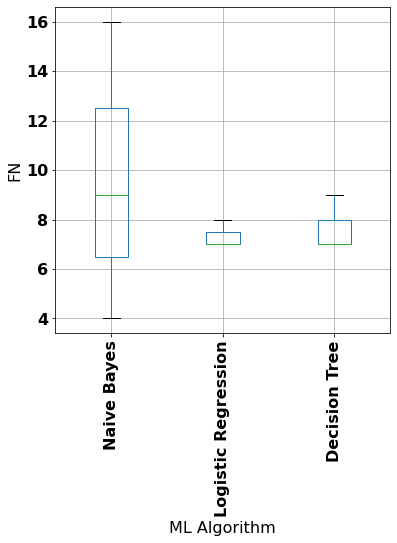

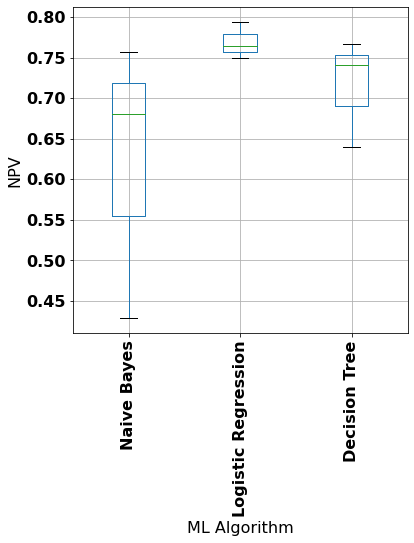

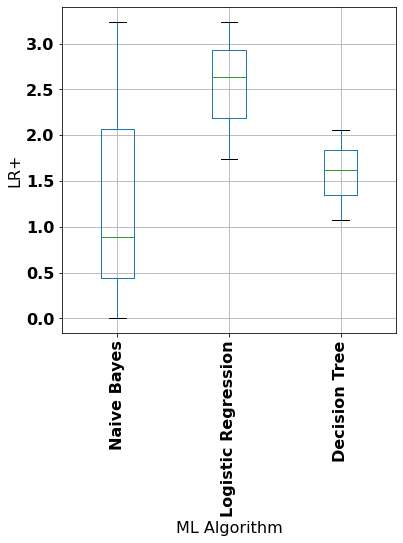

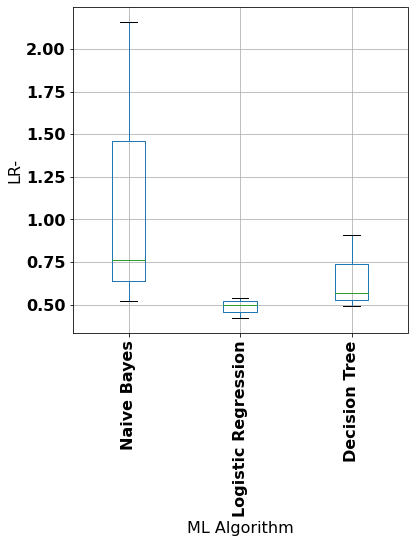

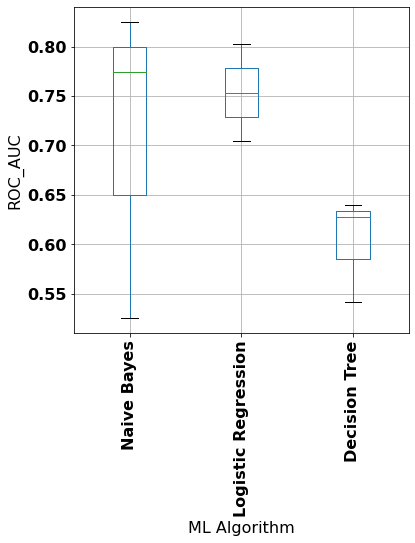

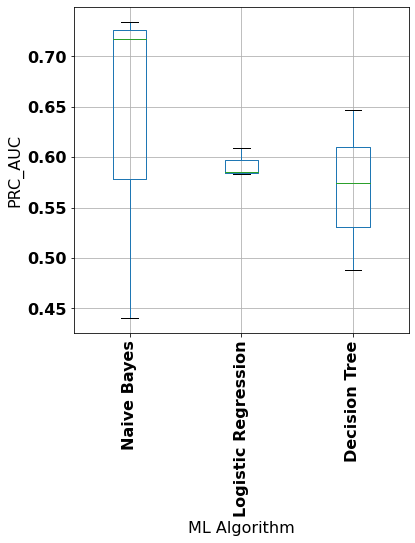

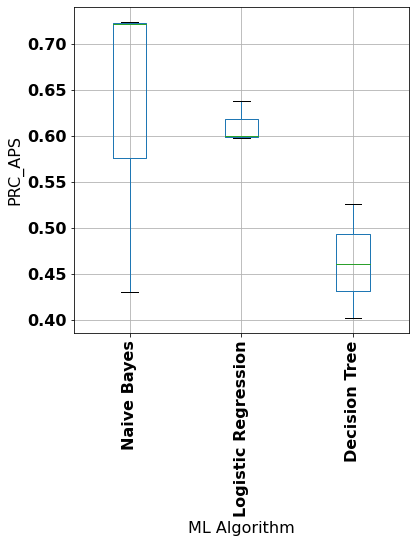

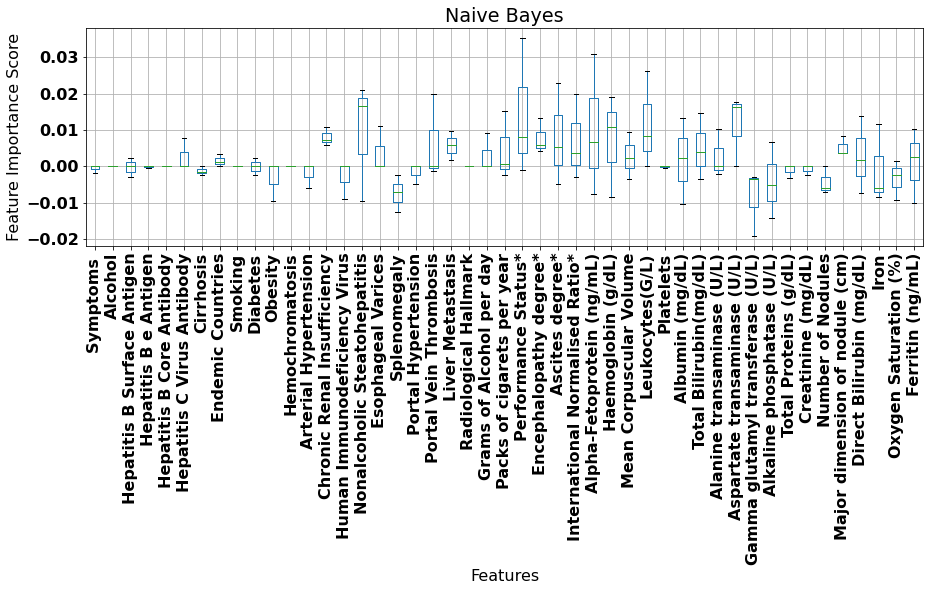

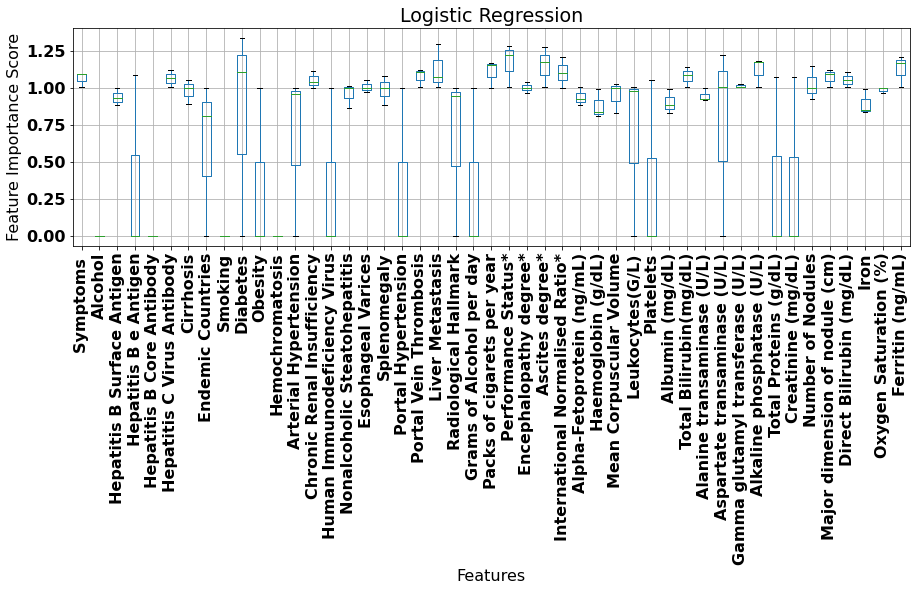

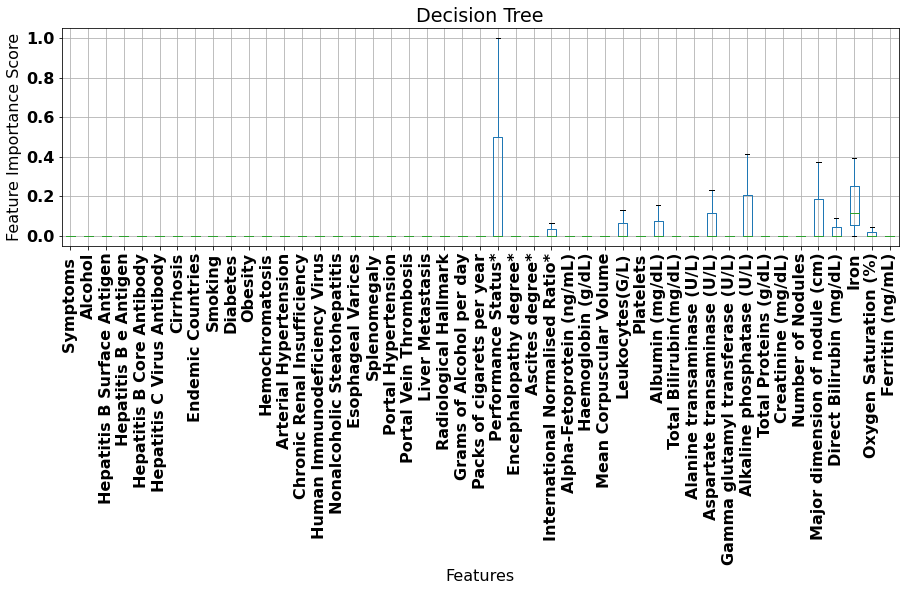

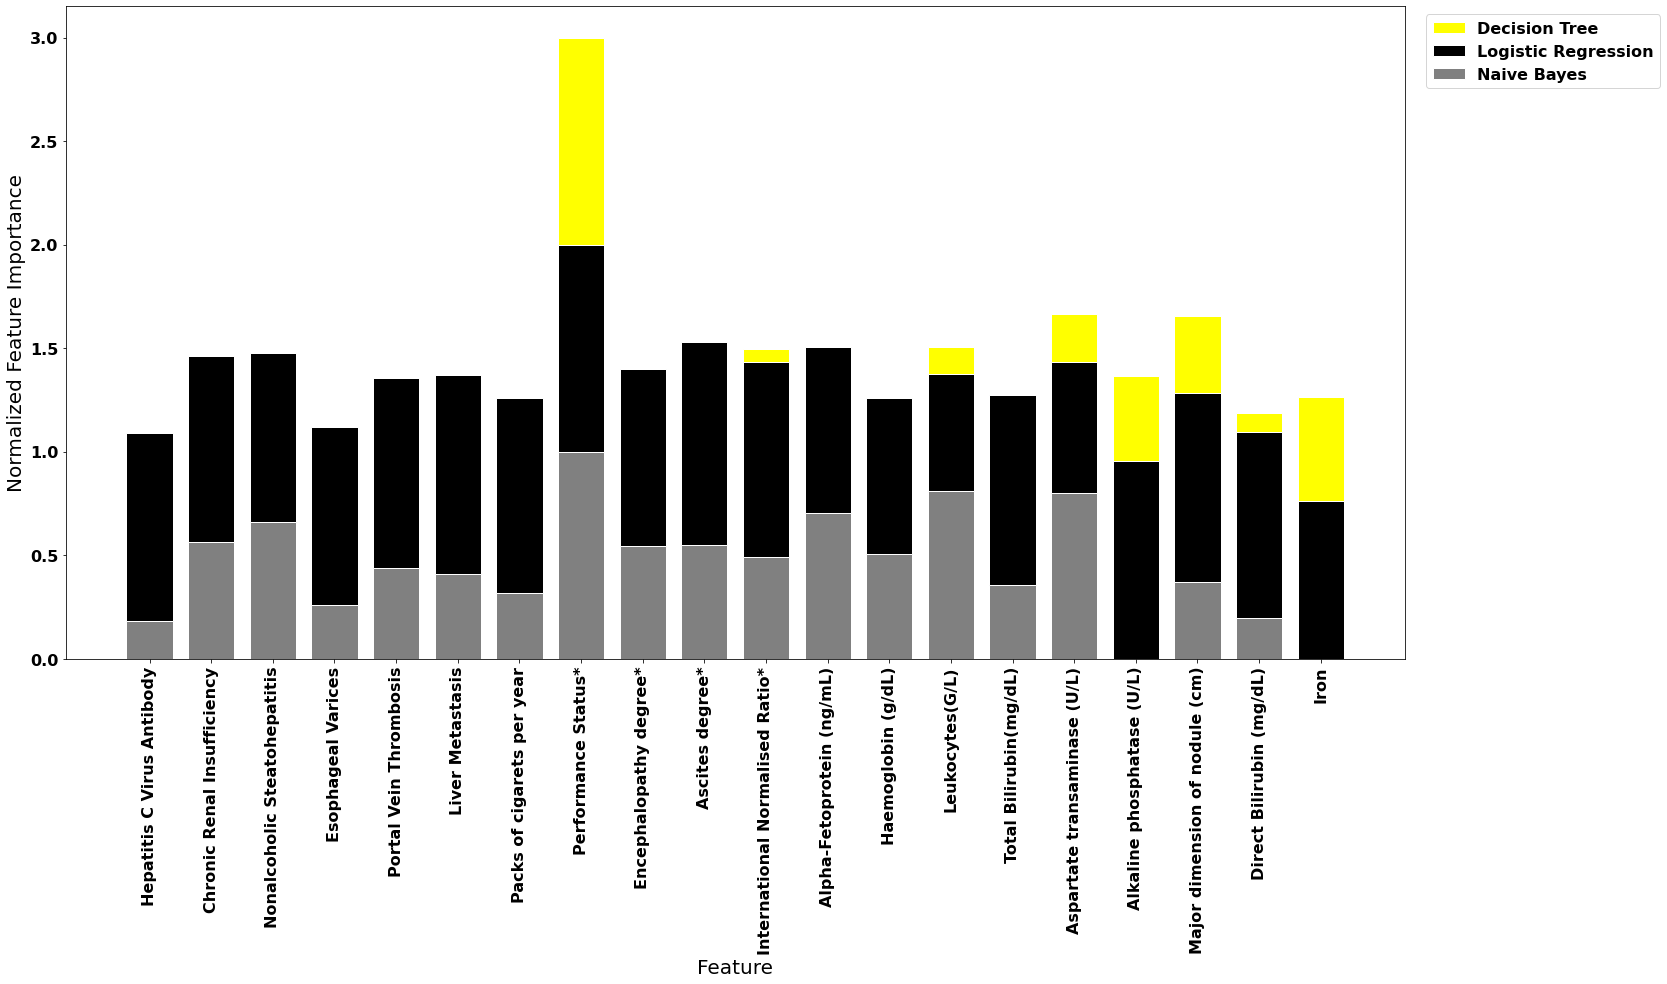

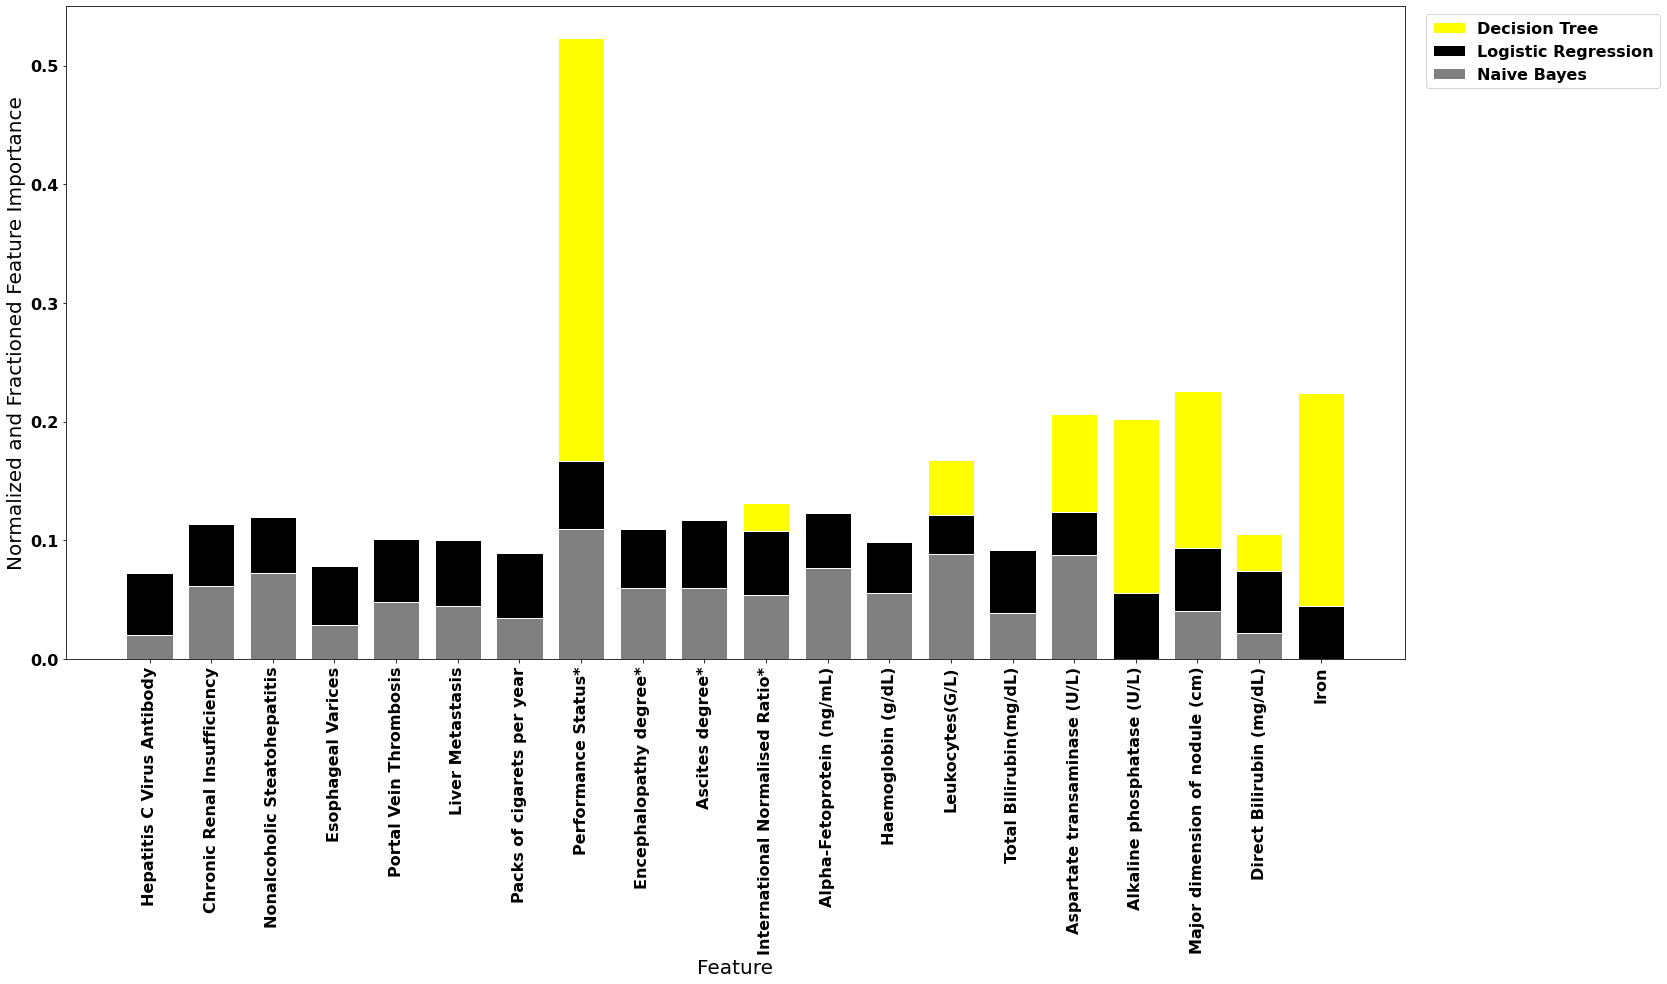

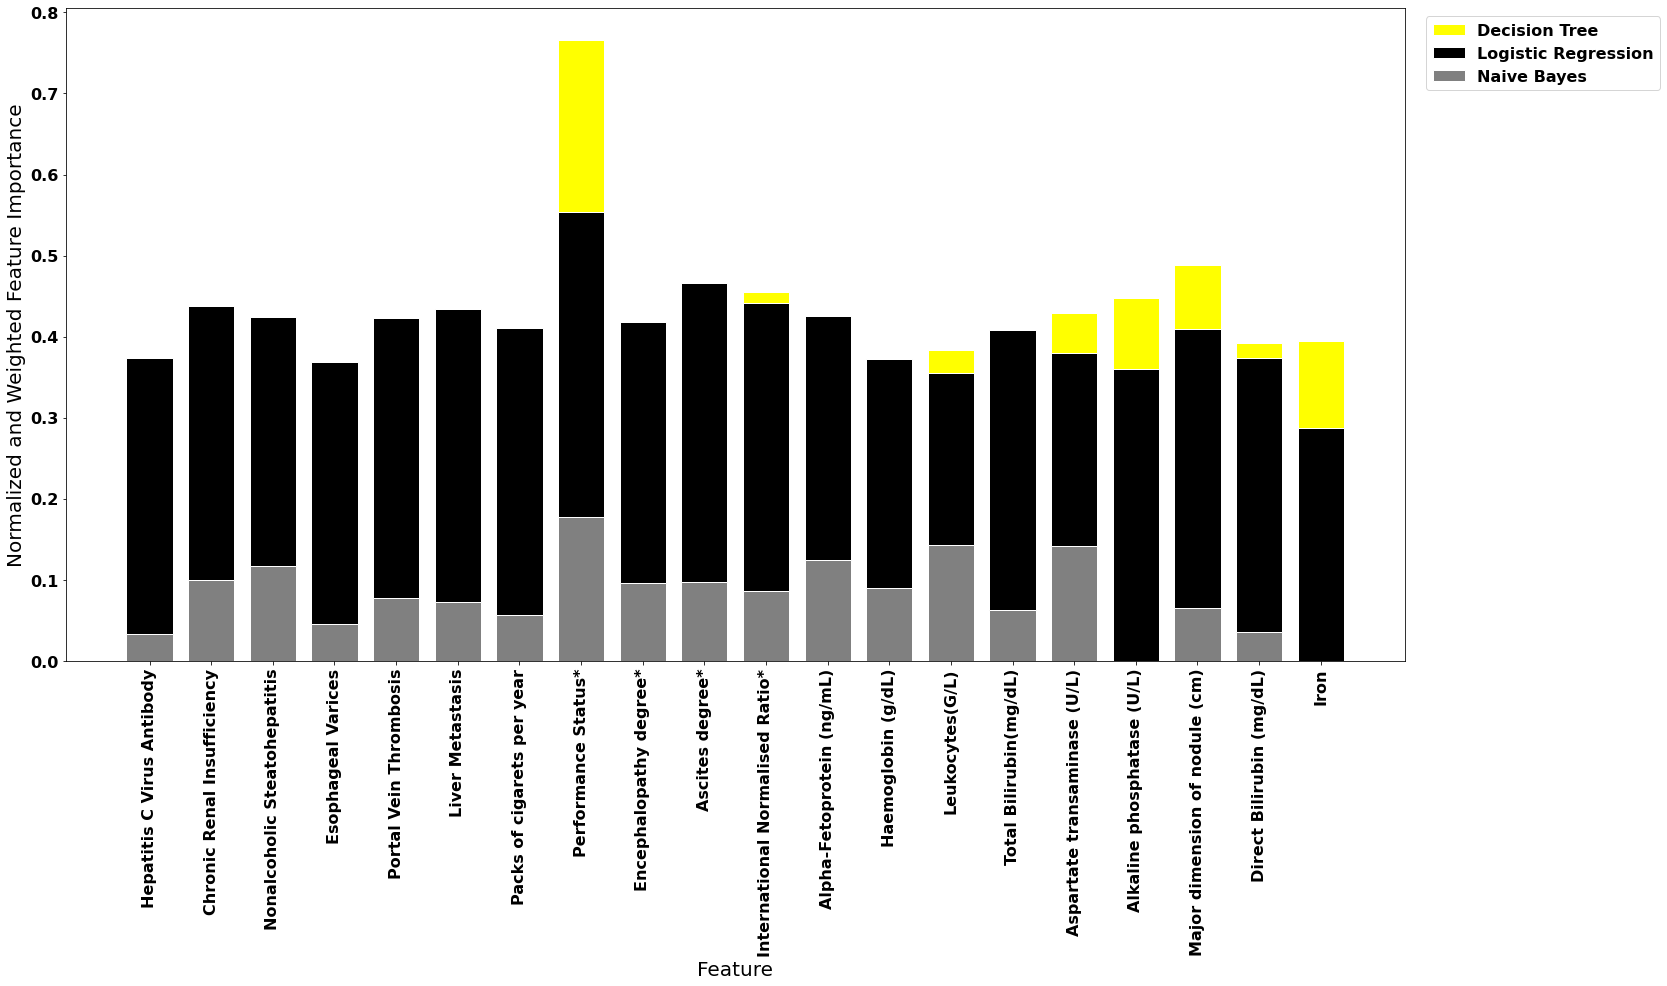

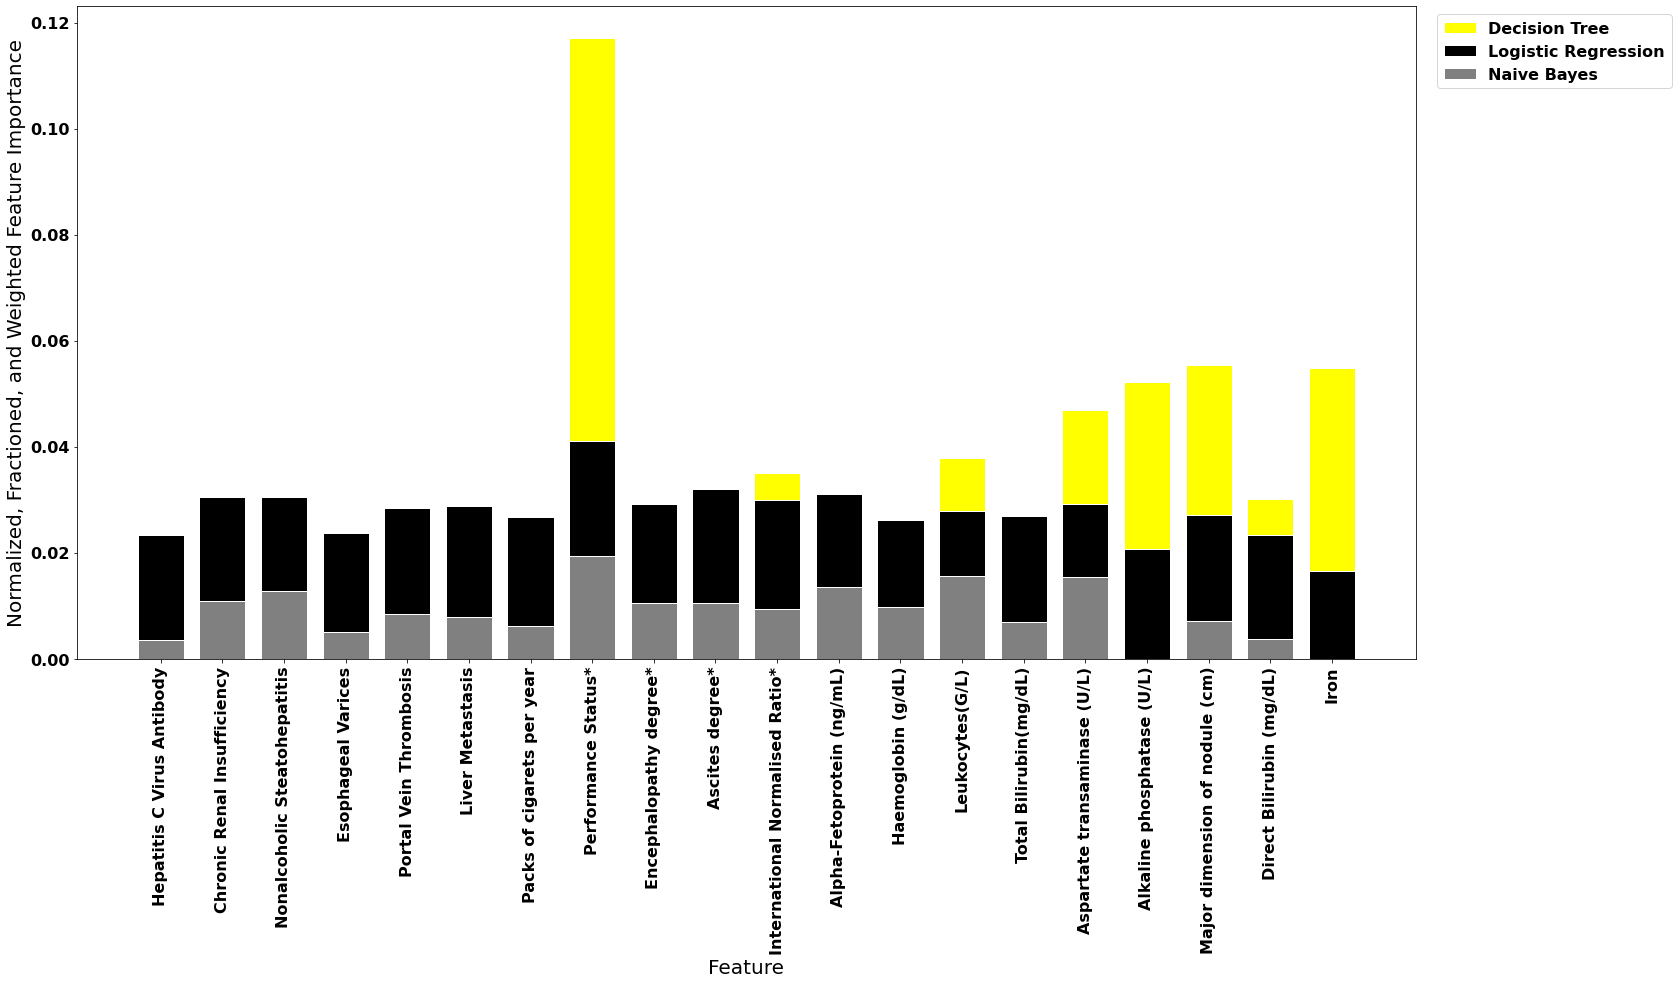

hcc-data_example_no_covariates phase 5 complete


In [25]:
encodedAlgos = ''
encodedAlgos = encode(do_NB, encodedAlgos)
encodedAlgos = encode(do_LR,encodedAlgos)
encodedAlgos = encode(do_DT, encodedAlgos)
encodedAlgos = encode(do_RF, encodedAlgos)
encodedAlgos = encode(do_GB, encodedAlgos)
encodedAlgos = encode(do_XGB, encodedAlgos)
encodedAlgos = encode(do_LGB, encodedAlgos)
encodedAlgos = encode(do_SVM, encodedAlgos)
encodedAlgos = encode(do_ANN, encodedAlgos)
encodedAlgos = encode(do_KN, encodedAlgos)
encodedAlgos = encode(do_eLCS, encodedAlgos)
encodedAlgos = encode(do_XCS, encodedAlgos)
encodedAlgos = encode(do_ExSTraCS, encodedAlgos)

# Iterate through datasets
dataset_paths = os.listdir(output_path + "/" + experiment_name)
dataset_paths.remove('metadata.csv')
dataset_paths.remove('jobsCompleted')
for dataset_directory_path in dataset_paths:
    full_path = output_path + "/" + experiment_name + "/" + dataset_directory_path
    StatsJob.job(full_path,encodedAlgos,plot_ROC,plot_PRC,plot_FI_box,class_label,instance_label,cv_partitions,plot_metric_boxplots,primary_metric,top_results,sig_cutoff,jupyterRun)
    #Stats(full_path,encodedAlgos,plot_ROC,plot_PRC,plot_FI_box,class_label,instance_label,cv_partitions,primary_metric)

## Phase 7 Dataset Comparison (only if > 1 dataset was analyzed)

### Phase 7 Import Additional Python Packages

In [26]:
import DataCompareJob

### Phase 7 Set Run Parameters

In [27]:
#None

### Phase 7 Conduct Dataset Comparison

In [28]:
if len(dataset_paths) > 1:
    DataCompareJob.job(output_path+'/'+experiment_name,sig_cutoff)

Phase 7 complete


## PDF Training Report Generator

In [29]:
import PDF_ReportTrainJob

In [30]:
experiment_path = output_path+'/'+experiment_name
PDF_ReportTrainJob.job(experiment_path)

2021-05-20 19:51:07.580189
Starting Report
Publishing Univariate Analysis
Publishing Model Prediction Summary
Publishing Average Model Prediction Statistics
Publishing Statistical Analysis
2
Publishing Runtime Summary
PDF Generation Complete


## Apply Models to Replication Data

### Import Additional Python Packages

In [31]:
import ApplyModelJob

### Specify Run Parameters

#### Manditory Parameters to Update

In [32]:
rep_data_path = "C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestRep" #as a test we use same copied dataset (no true replication data available)
data_path = "C:/Users/ryanu/OneDrive/Documents/GitHub/AutoMLPipe-BC/TestData/hcc-data_example.csv" 

### Conduct Application of Models to Replication Data

Data Counts: ----------------
Instance Count = 165
Feature Count = 49
    Categorical  = 28
    Quantitative = 21
Class Counts: ----------------
0    102
1     63
Name: Class, dtype: int64


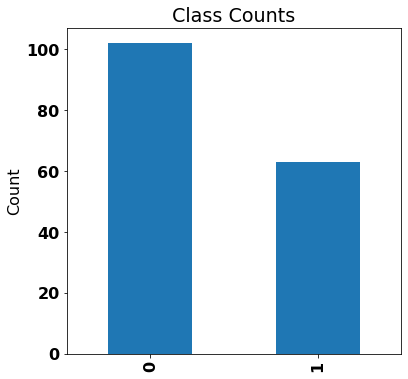

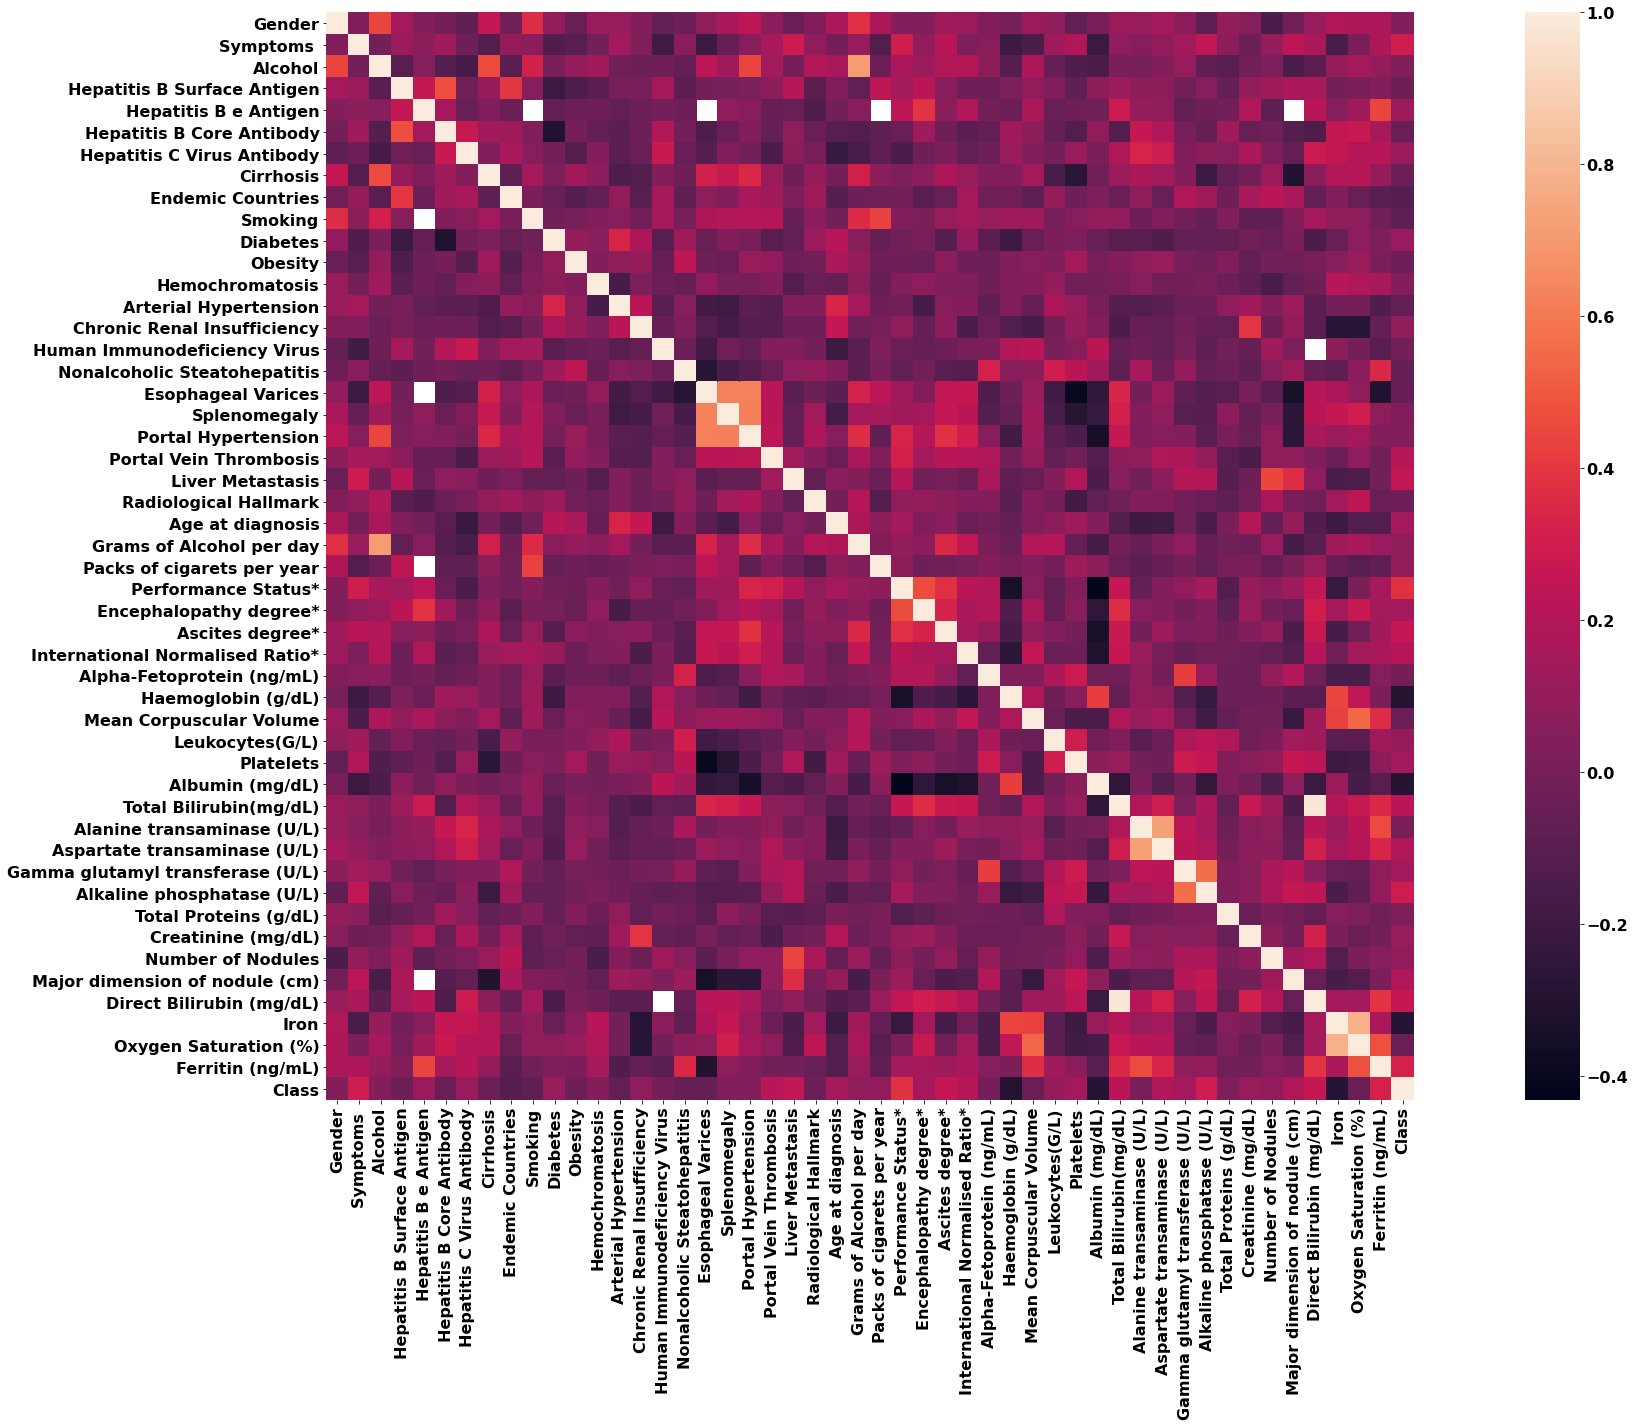

Logistic Regression


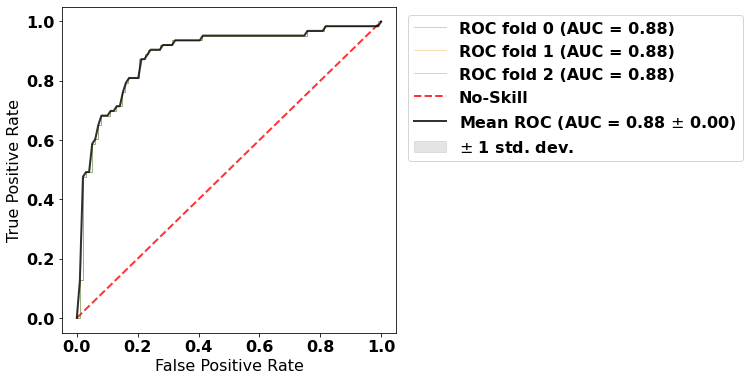

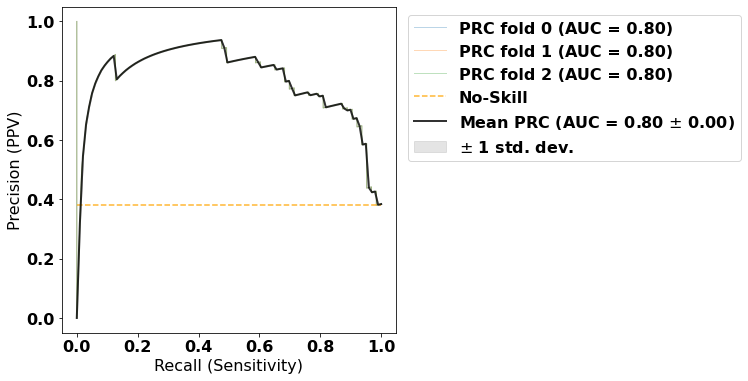

Decision Tree


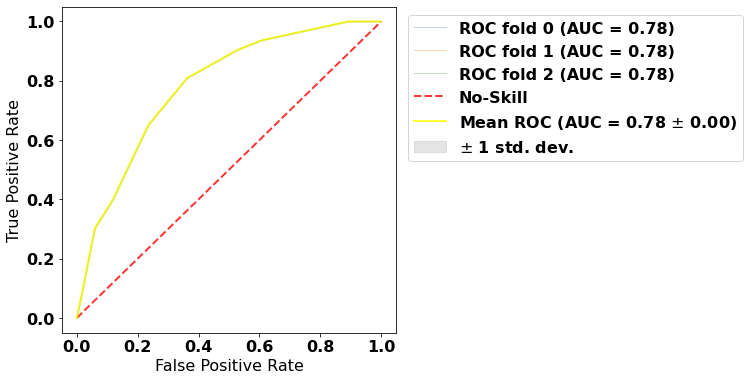

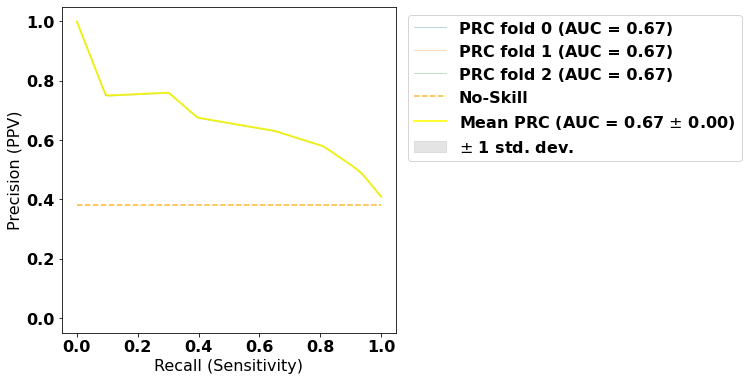

Naive Bayes


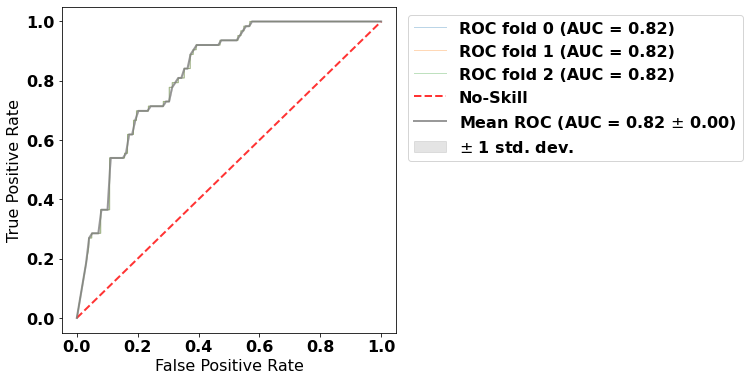

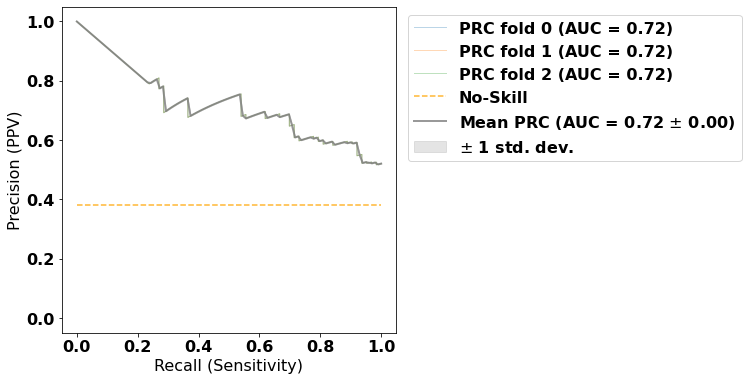

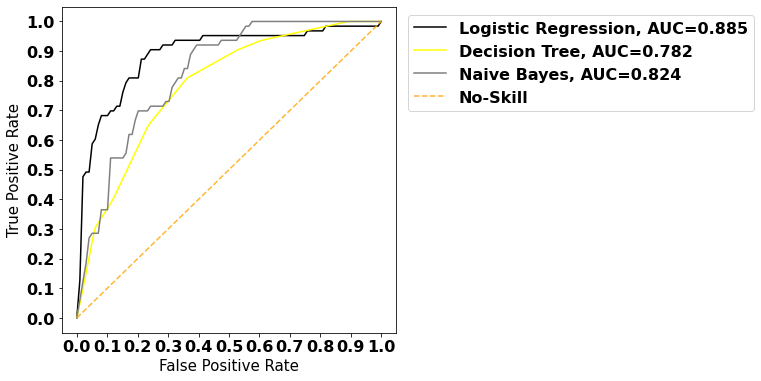

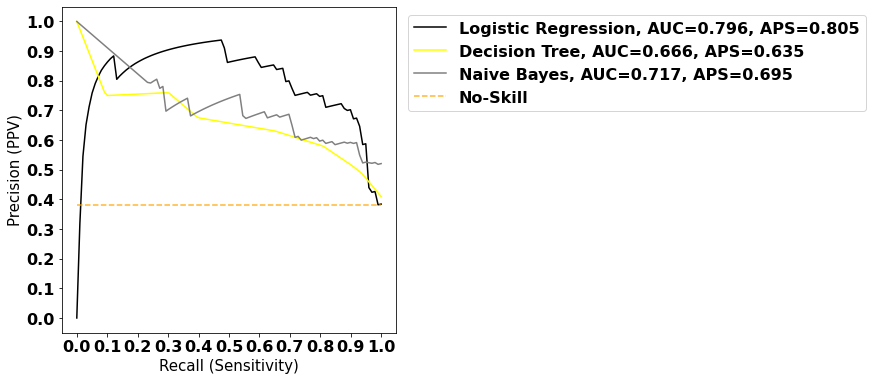

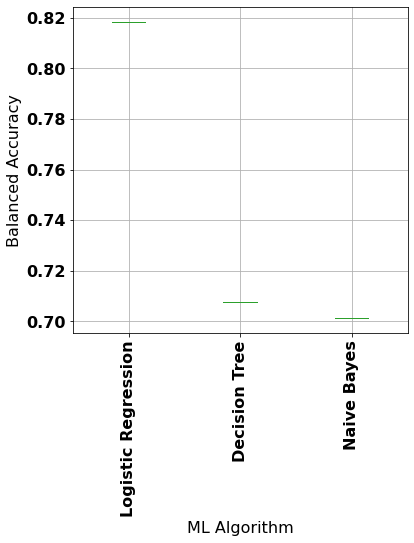

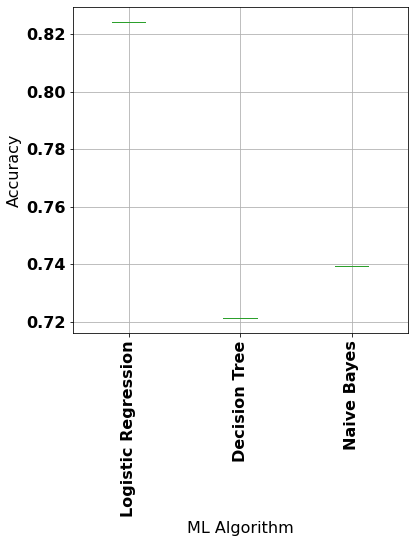

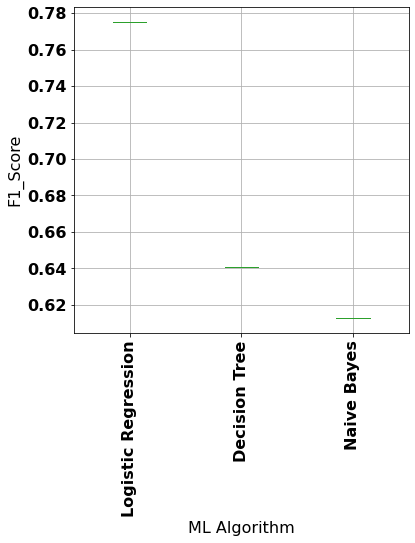

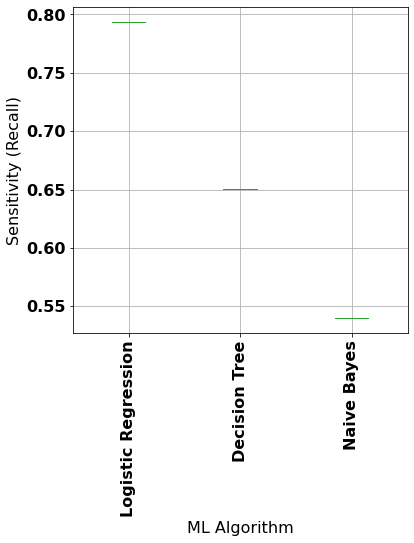

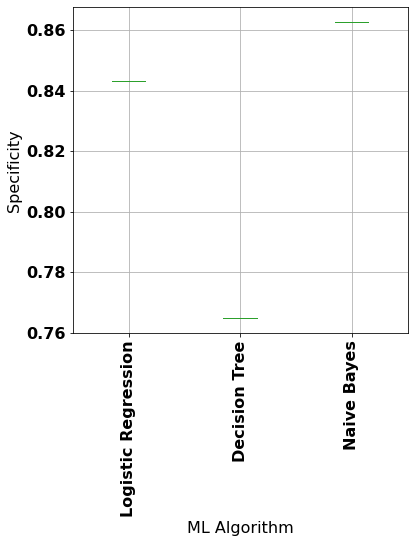

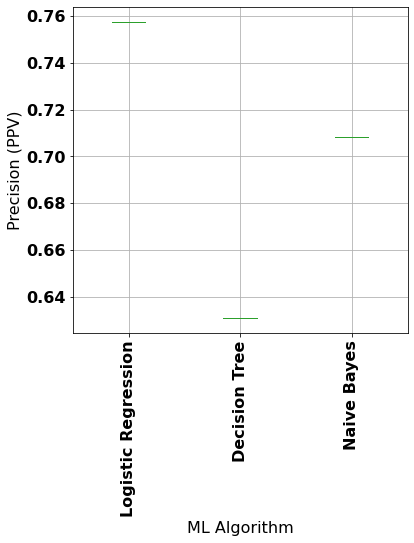

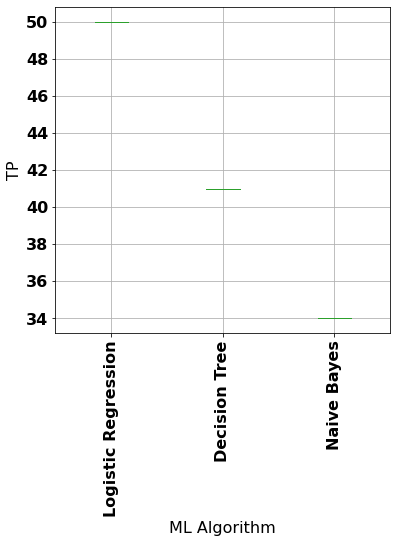

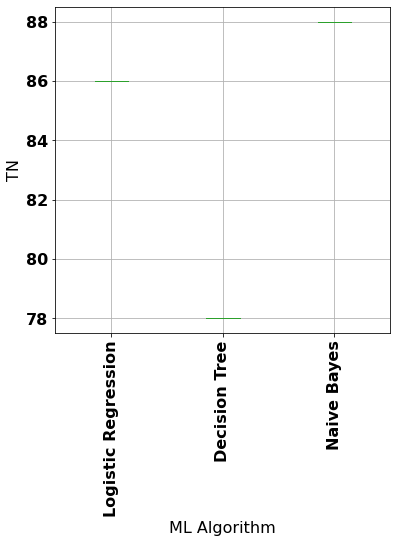

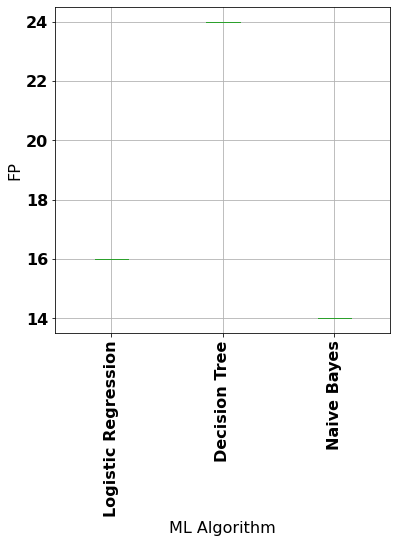

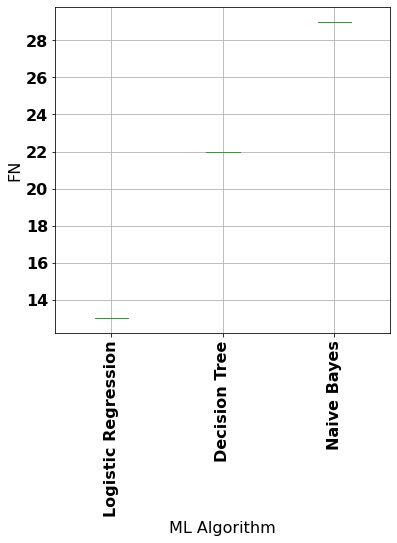

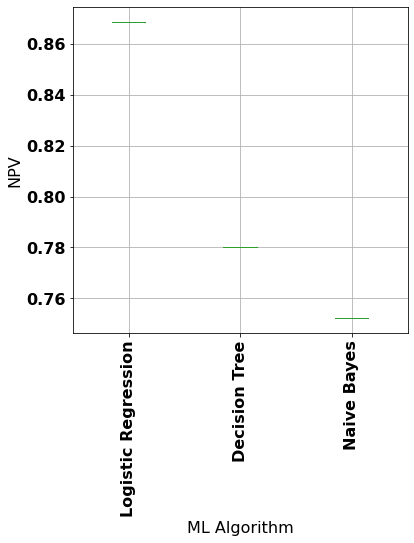

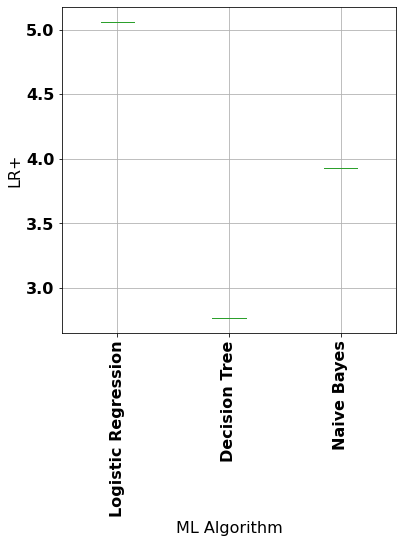

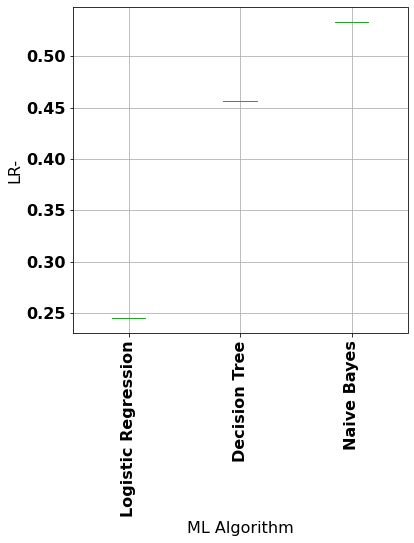

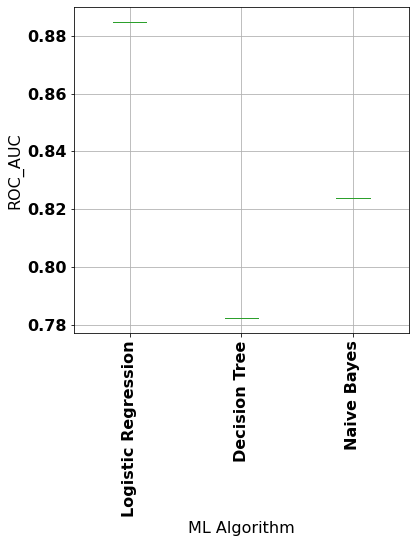

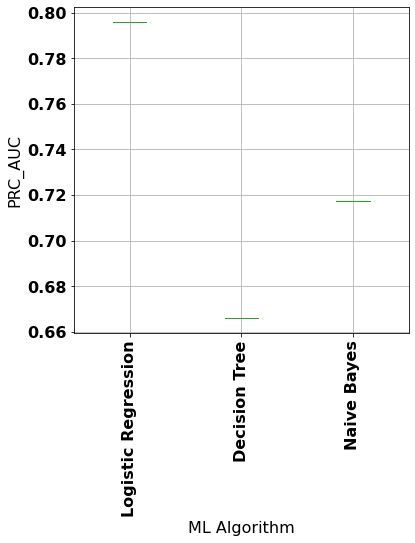

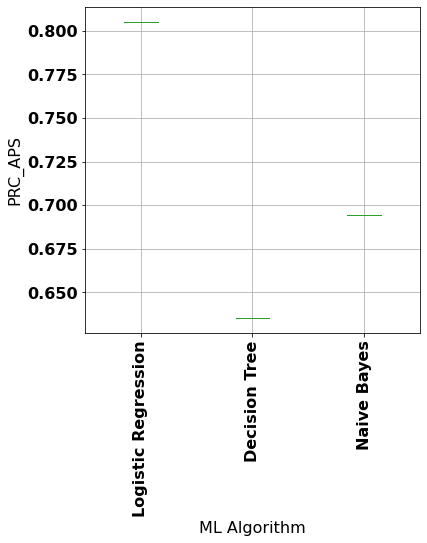

In [33]:
data_name = data_path.split('/')[-1].split('.')[0] #Save unique dataset names so that analysis is run only once if there is both a .txt and .csv version of dataset with same name.
full_path = output_path + "/" + experiment_name + "/" + data_name #location of folder containing models respective training dataset

if not os.path.exists(full_path+"/applymodel"):
    os.mkdir(full_path+"/applymodel")

#Determine file extension of datasets in target folder:
file_count = 0
unique_datanames = []
for datasetFilename in glob.glob(rep_data_path+'/*'):
    datasetFilename = str(datasetFilename).replace('\\','/')
        
    file_extension = datasetFilename.split('/')[-1].split('.')[-1]
    apply_name = datasetFilename.split('/')[-1].split('.')[0] #Save unique dataset names so that analysis is run only once if there is both a .txt and .csv version of dataset with same name.
    if not os.path.exists(full_path+"/applymodel/"+apply_name):
        os.mkdir(full_path+"/applymodel/"+apply_name)

    if file_extension == 'txt' or file_extension == 'csv':
        if apply_name not in unique_datanames:
            unique_datanames.append(apply_name)
            ApplyModelJob.job(datasetFilename,full_path,class_label,instance_label,categorical_cutoff,sig_cutoff,cv_partitions,scale_data,impute_data,do_LR,do_DT,do_RF,do_NB,do_XGB,do_LGB,do_SVM,do_ANN,do_ExSTraCS,do_eLCS,do_XCS,do_GB,do_KN,primary_metric,data_path,match_label,plot_ROC,plot_PRC,plot_metric_boxplots,export_feature_correlations,jupyterRun)
            file_count += 1

if file_count == 0: #Check that there was at least 1 dataset
    raise Exception("There must be at least one .txt or .csv dataset in rep_data_path directory")

## PDF Apply Report Generator

In [34]:
import PDF_ReportApplyJob

In [35]:
experiment_path = output_path+'/'+experiment_name
PDF_ReportApplyJob.job(experiment_path,rep_data_path,data_path)

['hcc-data_example_rep']
Starting Report
Publishing Model Prediction Summary
Publishing Average Model Prediction Statistics
PDF Generation Complete
